# LAB1 - CNS
Implement Izhikevich model and develop 20 neuro-computational features of biological neurons.

Importation of needed libraries.

In [1]:
import matplotlib.pyplot as plt
import string
from typing import Callable

Class that simulates `Izhikevich model` at time t. For integration is used the `leap-frog method`.

In [2]:
class IzhikevichModel:
    """
    Izhikevich model class able to provide methods to compute membrane potential (u) and recovery variable (w) at time t
    """

    def __init__(self, a: float, b: float, c: float, d: float) -> None:
        """
        IzhikevichModel constructor.

        a: a parameter value at time t
        b: b parameter value at time t
        c: c parameter value at time t
        d: d parameter value at time t
        """
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def _compute_u_incrementation(self, I: float, u: float, w: float) -> float:
        """
        Method to compute membrane potential value (u) at time t.

        I: current input parameter at time t.
        u: previous membrane potential value at time t.
        w: previous recovery variable value at time t.

        returns:
            float: Computed u at time t.
        """
        return 0.04 * u ** 2 + 5 * u + 140 - w + I

    def _compute_w_incrementation(self, u, w) -> float:
        """
        Method to compute recovery variable (w) value at time t.

        u: current membrane potential value at time t.
        w: previous recovery variable value at time t.

        returns:
            float: Computed w at time t.
        """
        return self.a * (self.b * u - w)

    def __call__(self, u: float, w: float, I: float, tau: float) -> tuple[float, float, float]:
        """
        Method that is able to compute membrane potential and recovery variable with Izhikevich model.

        u: float = previous membrane potential value at time t.
        w: previous recovery variable value at time t.
        I: current input parameter at time t.
        tau: time step for integration.

        returns:
            tuple[float, float, float]: Tuple of values corresponding to u, w and u_plot at time t.
        """
        u += tau * self._compute_u_incrementation(I, u, w)
        w += tau * self._compute_w_incrementation(u, w)
        # u_plot is the value of u to plot that sometimes is different from value of u used during computation for each time steps
        u_plot = u
        if u >= 30:
            u = self.c
            w = w + self.d
            u_plot = 30
        return u, w, u_plot

Function able to simulate an Izhikevich model for some time steps given an input current.

In [3]:
def simulate_neuron(
        model: IzhikevichModel,
        current_generator: Callable,
        tau: float,
        t_max: float,
        u_init: float,
        w_init: float = None
) -> tuple[list[float], list[float], list[float], list[float]]:
    """
    Function able to simulate an Izhikevich model for some time steps given an input current.

    model: Izhikevich model used for simulation.
    current_generator: Function able to generate the current at time t.
    tau: Time step value.
    t_max: Maximum value of time.
    u_init: Initial value of membrane potential.
    w_init: Initial value of recovery variable.

    returns:
        tuple[list[float], list[float], list[float], list[float]]: Tuple containing the list of values related to time, u, w and input current.
    """
    t = 0
    u, w = u_init, w_init
    tl, ul, wl, il = [t], [u], [w], [0]
    if w is None:
        w = model.b * u
    while t < t_max:
        I = current_generator(t)
        u, w, u_plot = model(u=u, w=w, I=I, tau=tau)
        tl.append(t)
        ul.append(u_plot)
        wl.append(w)
        il.append(I)
        t += tau
    return tl, ul, wl, il

Function able to plot simulation results.

In [4]:
def plot_simulation(title: string, values: tuple[list[float], list[float], list[float], list[float]]) -> None:
    """
    Function able to plot simulation results.

    title: Plot title.
    values: Simulation results to plot.
    """
    t_list, u_list, w_list, i_list = values
    fig, ax = plt.subplots(2, 2, gridspec_kw={'height_ratios': [5, 1]}, figsize=(20, 10))
    fig.suptitle(title)
    ax[0, 0].set_title('Membrane potential dynamics')
    ax[0, 0].plot(t_list, u_list)
    ax[0, 0].set_xlabel('time (t)')
    ax[0, 0].set_ylabel('membrane potential (u)')
    ax[0, 0].grid()
    ax[0, 1].set_title('Phase portrait')
    ax[0, 1].plot(u_list, w_list)
    ax[0, 1].set_xlabel('membrane potential (u)')
    ax[0, 1].set_ylabel('recovery variable (w)')
    ax[0, 1].grid()
    ax[1, 0].plot(t_list, i_list, color='r')
    ax[1, 0].set_xlabel('time (t)')
    ax[1, 0].set_ylabel('input (I)')
    ax[1, 0].grid()
    ax[1, 1].remove()
    plt.savefig(f'plots/{title}.png')

## A - tonic spiking

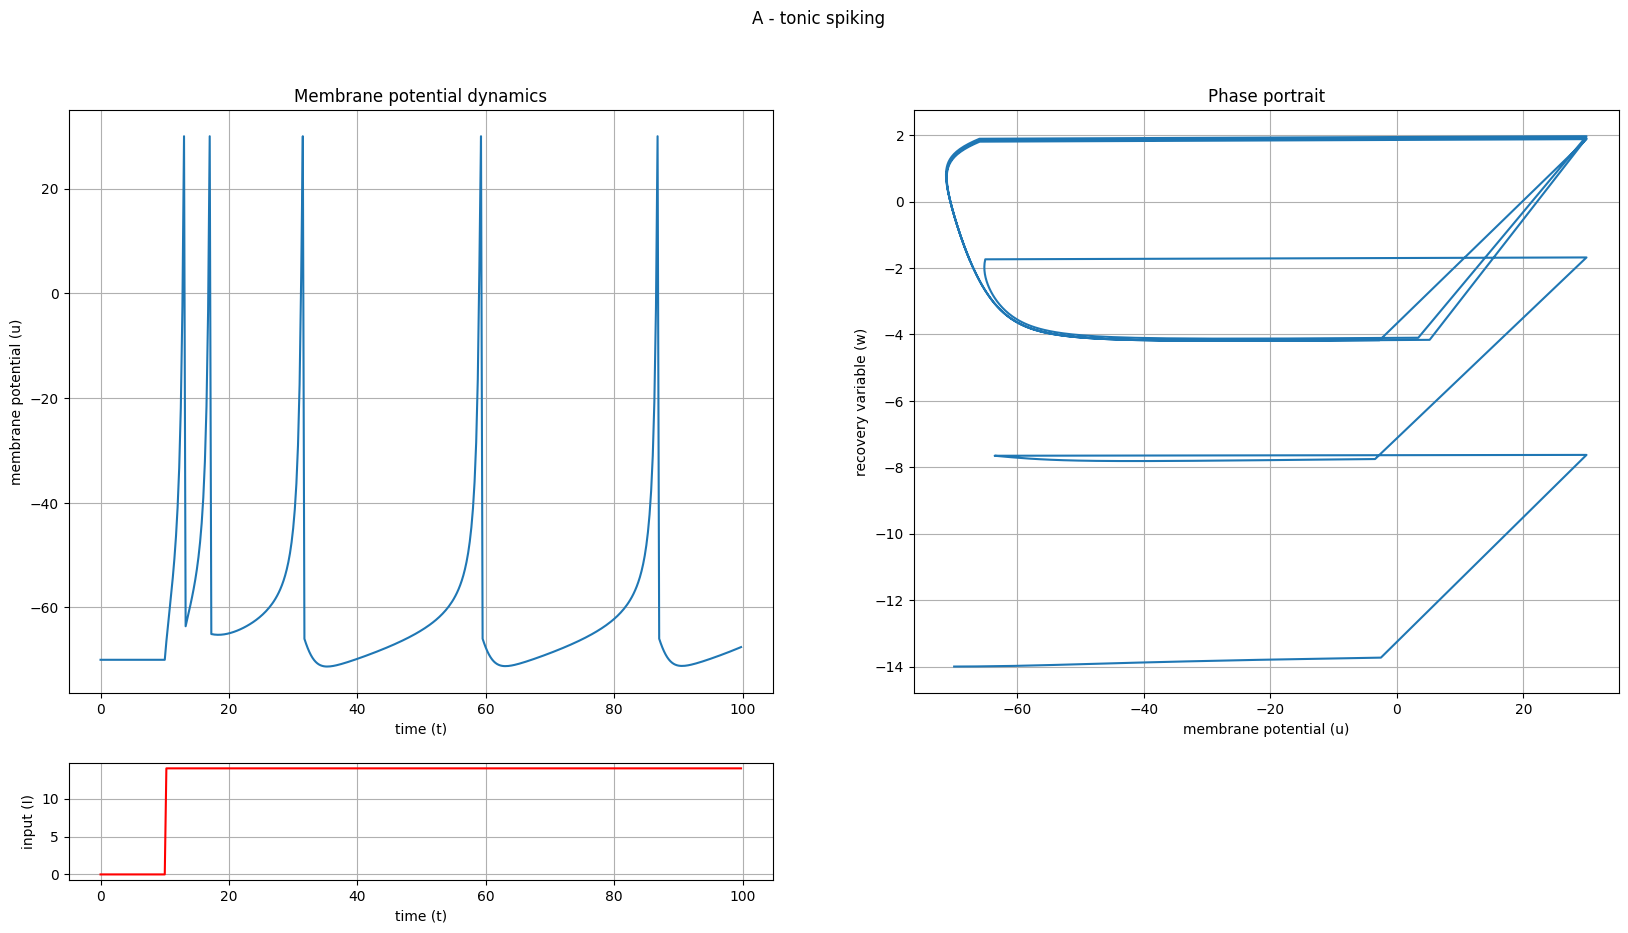

In [5]:
t_max = 100


def current_generator(t: float) -> float:
    if t > t_max / 10:
        return 14
    else:
        return 0


tonic_spiking = IzhikevichModel(a=0.02, b=0.2, c=-65, d=6)

result = simulate_neuron(
    model=tonic_spiking,
    current_generator=current_generator,
    tau=0.25,
    t_max=t_max,
    u_init=-70,
)
plot_simulation('A - tonic spiking', result)

## B - phasic spiking

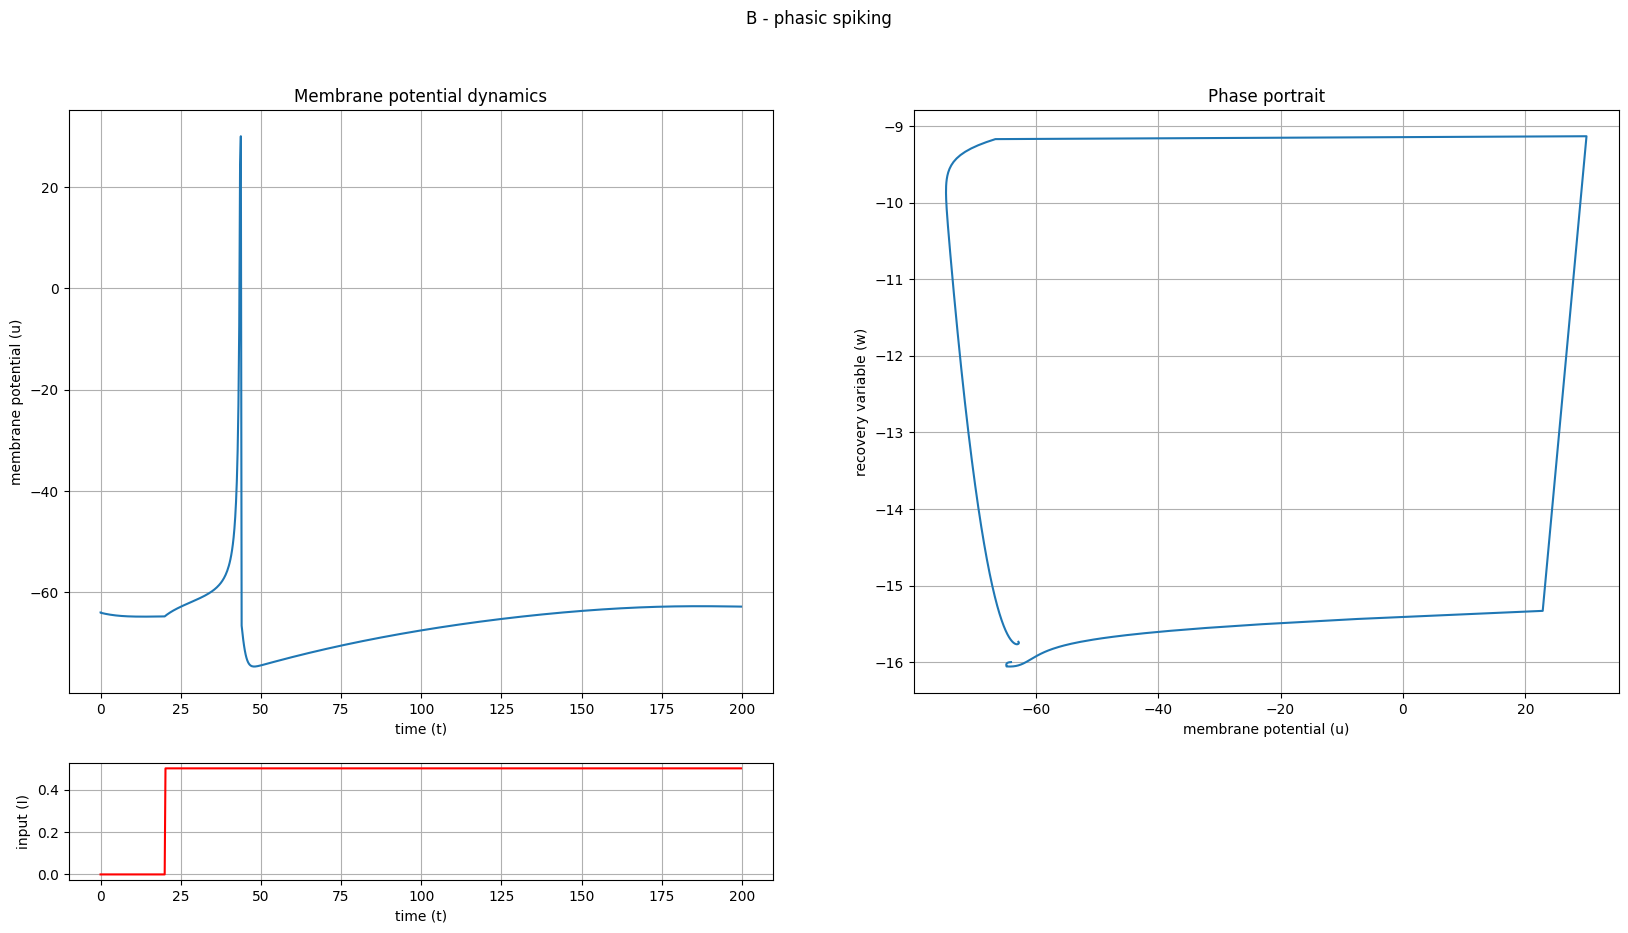

In [6]:
def current_generator(t: float) -> float:
    if t > 20:
        return 0.5
    else:
        return 0


phasic_spiking = IzhikevichModel(a=0.02, b=0.25, c=-65, d=6)

result = simulate_neuron(
    model=phasic_spiking,
    current_generator=current_generator,
    tau=0.25,
    t_max=200,
    u_init=-64,
)
plot_simulation('B - phasic spiking', result)

## C - tonic bursting

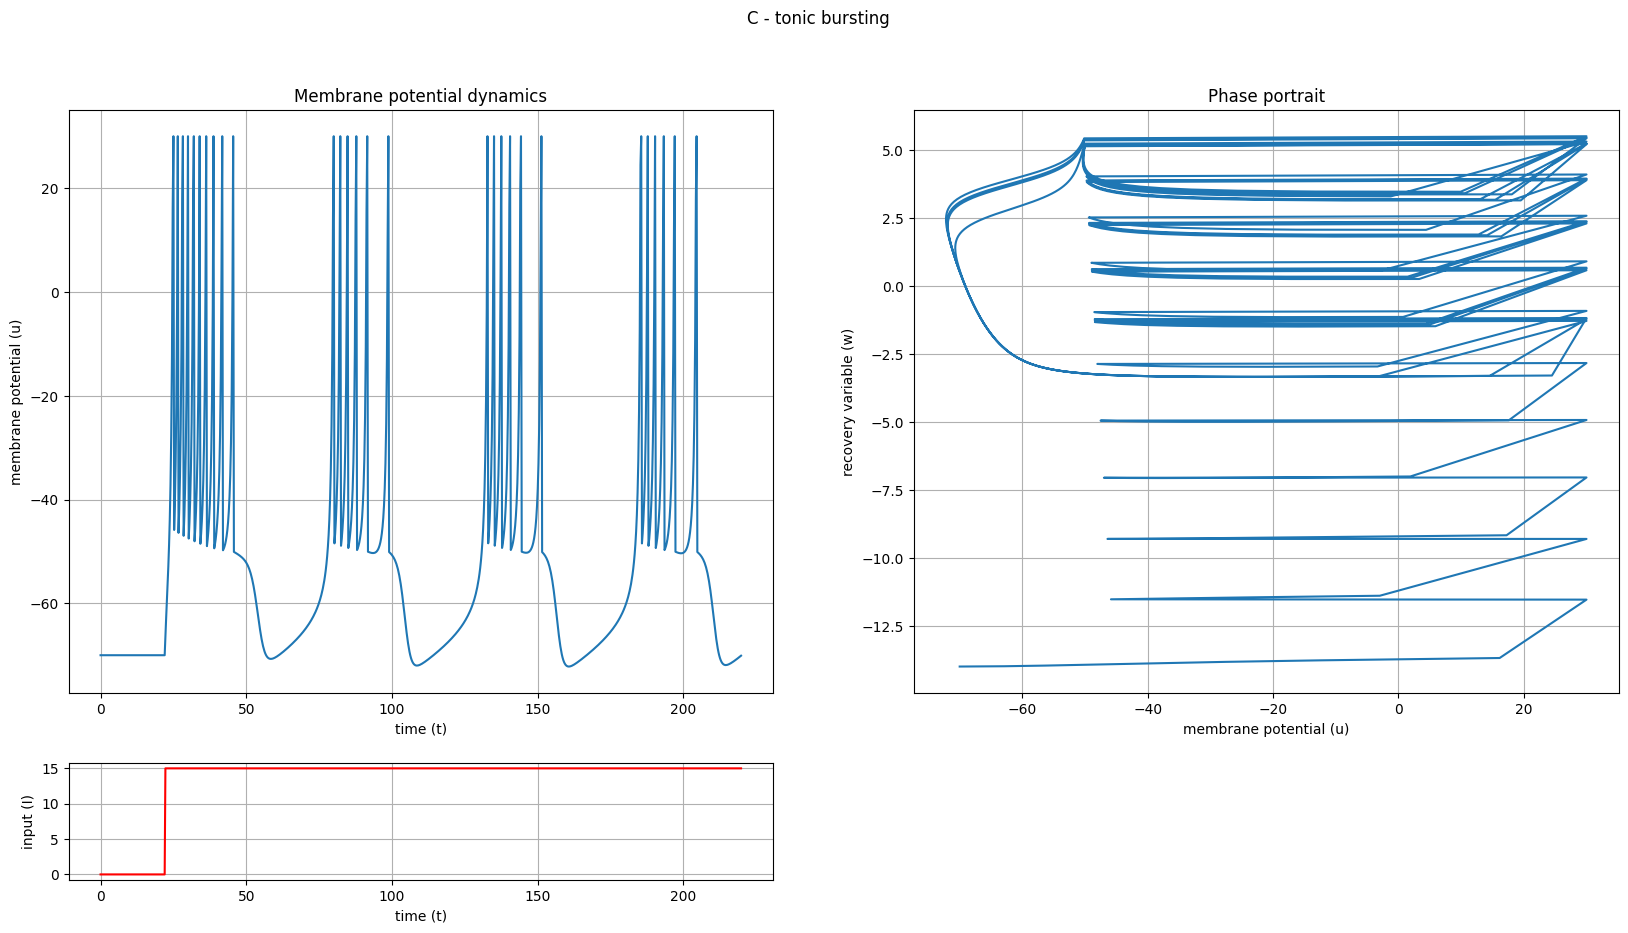

In [7]:
def current_generator(t: float) -> float:
    if t > 22:
        return 15
    else:
        return 0


tonic_bursting = IzhikevichModel(a=0.02, b=0.2, c=-50, d=2)

result = simulate_neuron(
    model=tonic_bursting,
    current_generator=current_generator,
    tau=0.25,
    t_max=220,
    u_init=-70,
)
plot_simulation('C - tonic bursting', result)

## D - phasic bursting

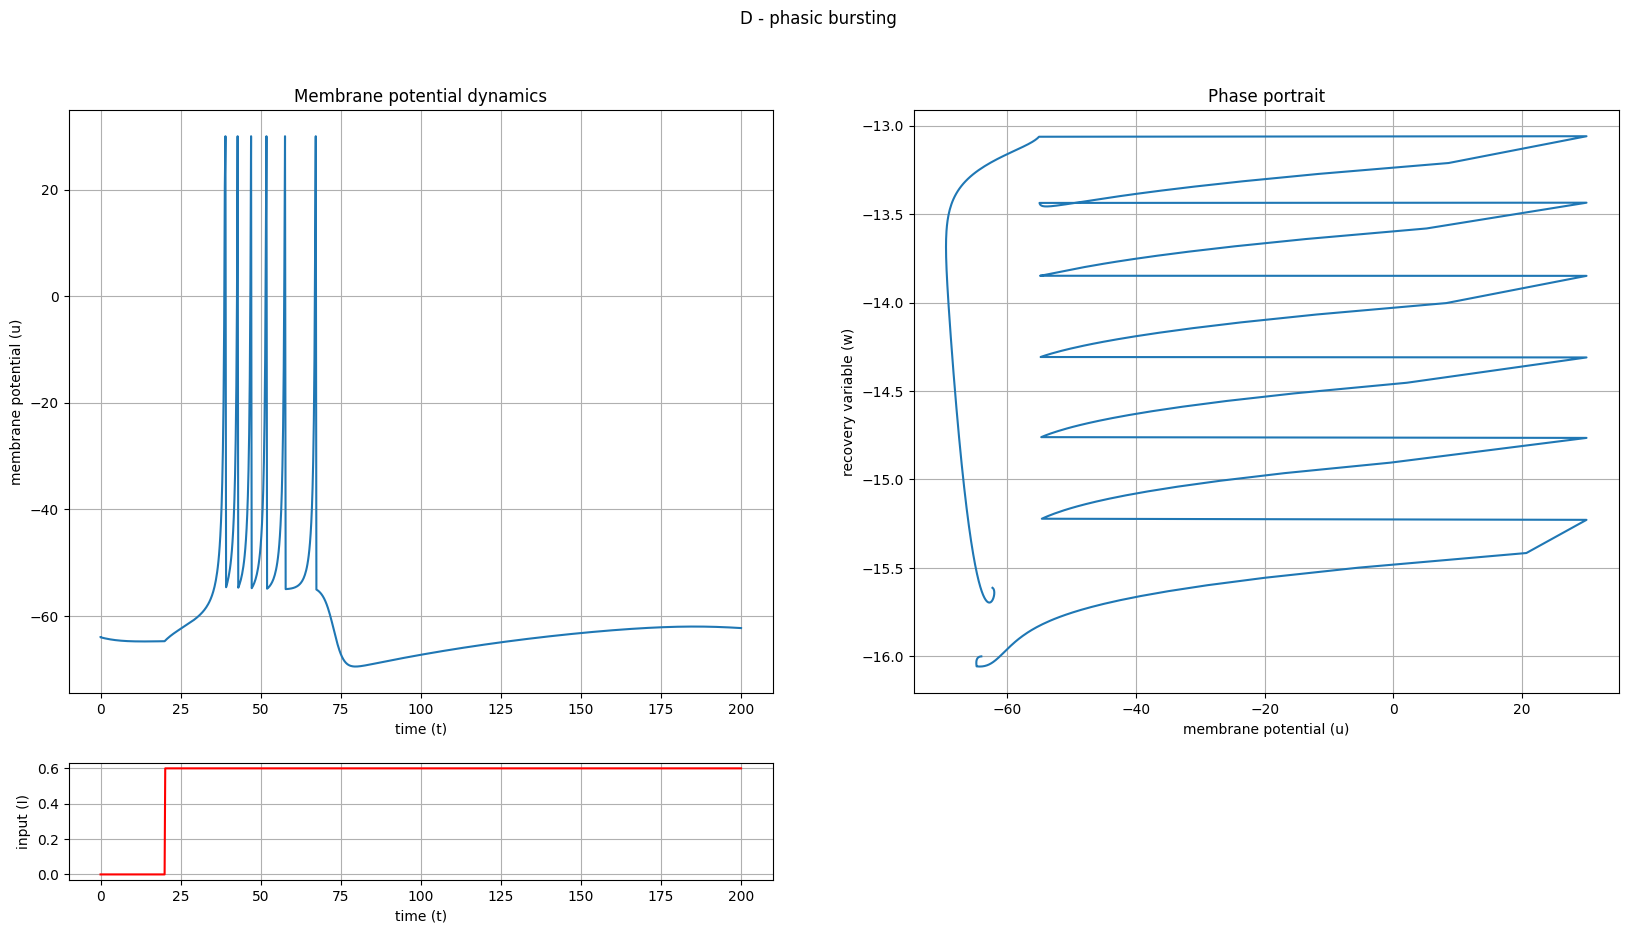

In [8]:
def current_generator(t: float) -> float:
    if t > 20:
        return 0.6
    else:
        return 0


phasic_bursting = IzhikevichModel(a=0.02, b=0.25, c=-55, d=0.05)

result = simulate_neuron(
    model=phasic_bursting,
    current_generator=current_generator,
    tau=0.2,
    t_max=200,
    u_init=-64,
)
plot_simulation('D - phasic bursting', result)

## E - mixed mode

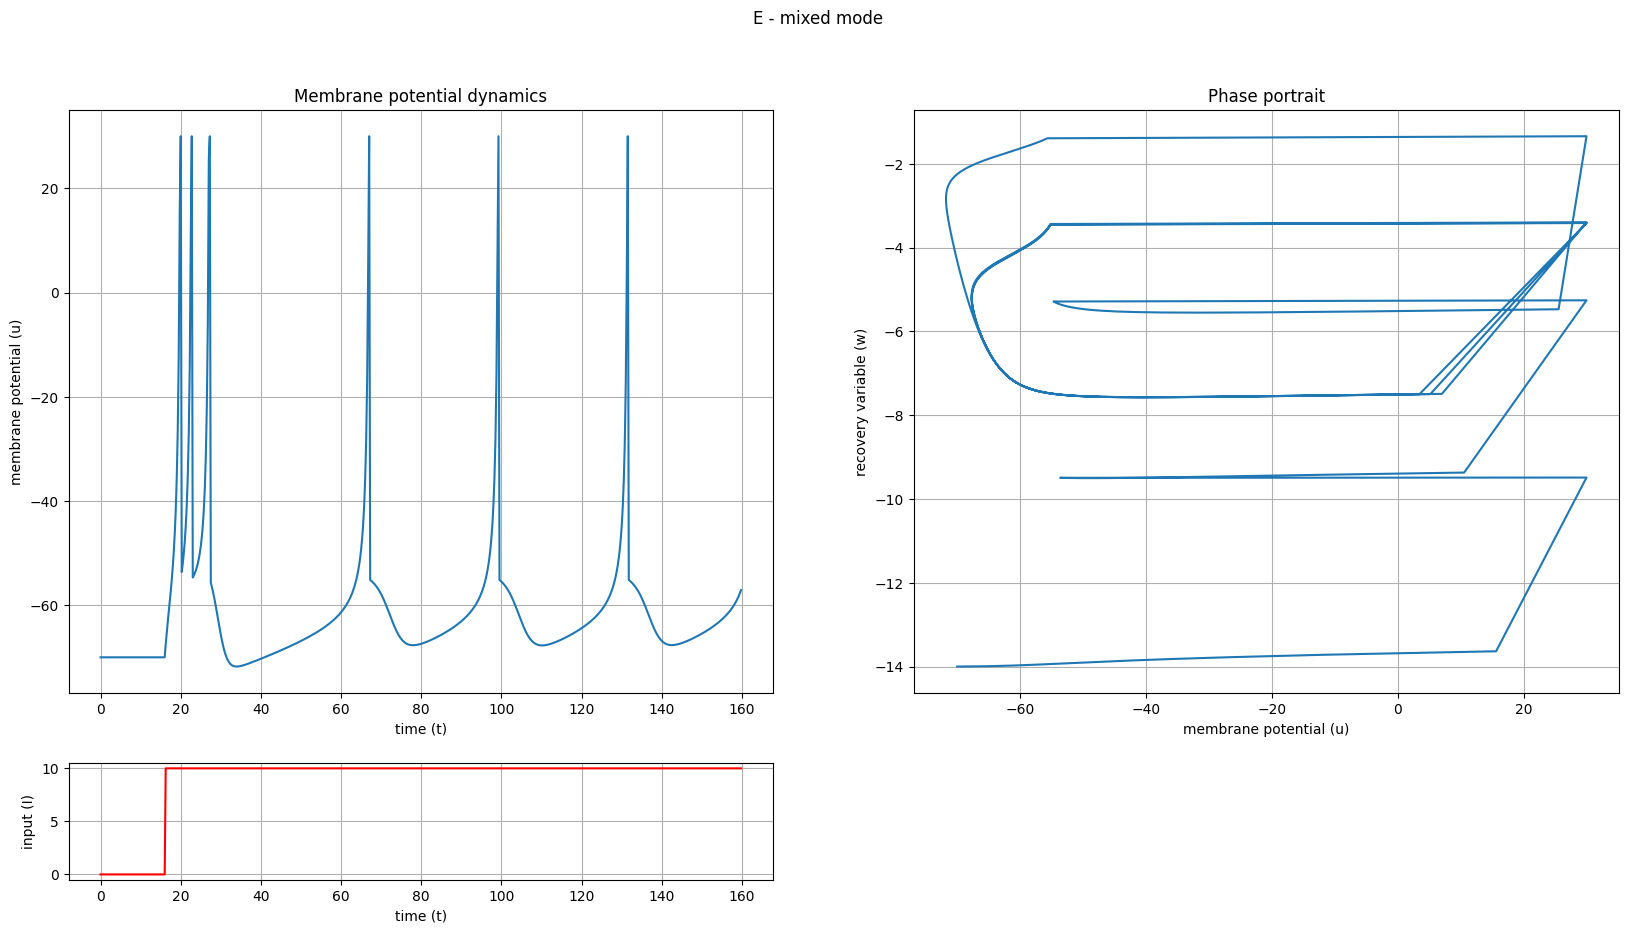

In [9]:
t_max = 160


def current_generator(t: float) -> float:
    if t > t_max / 10:
        return 10
    else:
        return 0


mixed_mode = IzhikevichModel(a=0.02, b=0.2, c=-55, d=4)

result = simulate_neuron(
    model=mixed_mode,
    current_generator=current_generator,
    tau=0.25,
    t_max=t_max,
    u_init=-70,
)
plot_simulation('E - mixed mode', result)

## F - spike frequency adaptation

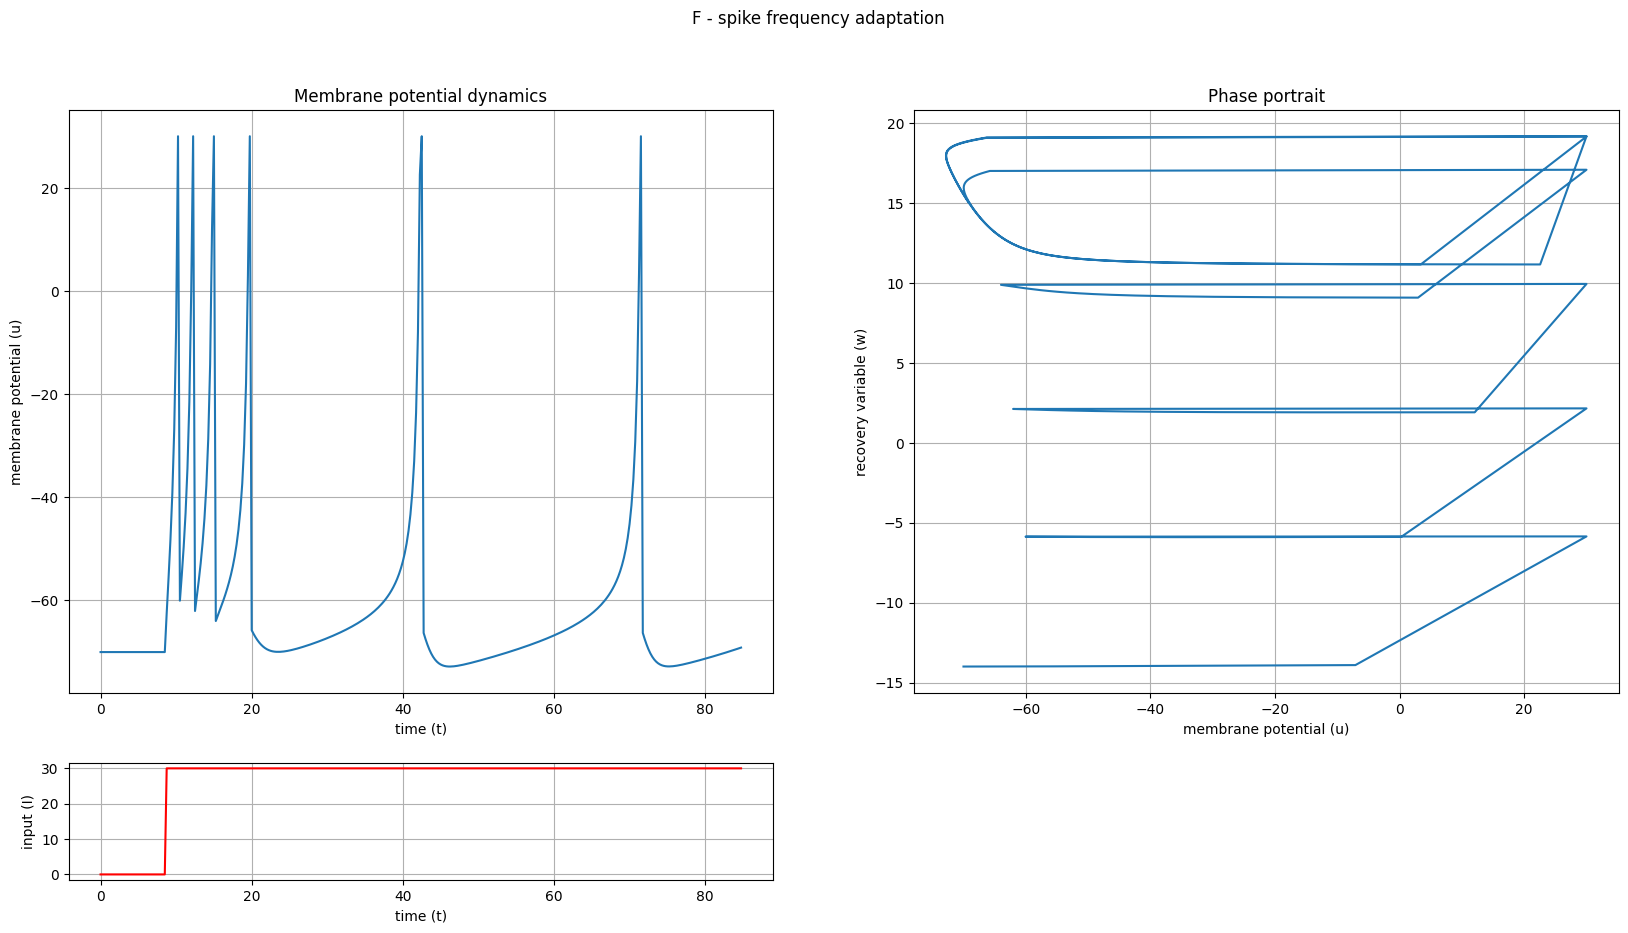

In [10]:
t_max = 85


def current_generator(t: float) -> float:
    if t > t_max / 10:
        return 30
    else:
        return 0


spike_frequency_adaptation = IzhikevichModel(a=0.01, b=0.2, c=-65, d=8)

result = simulate_neuron(
    model=spike_frequency_adaptation,
    current_generator=current_generator,
    tau=0.25,
    t_max=t_max,
    u_init=-70,
)
plot_simulation('F - spike frequency adaptation', result)

## G - Class 1 excitability

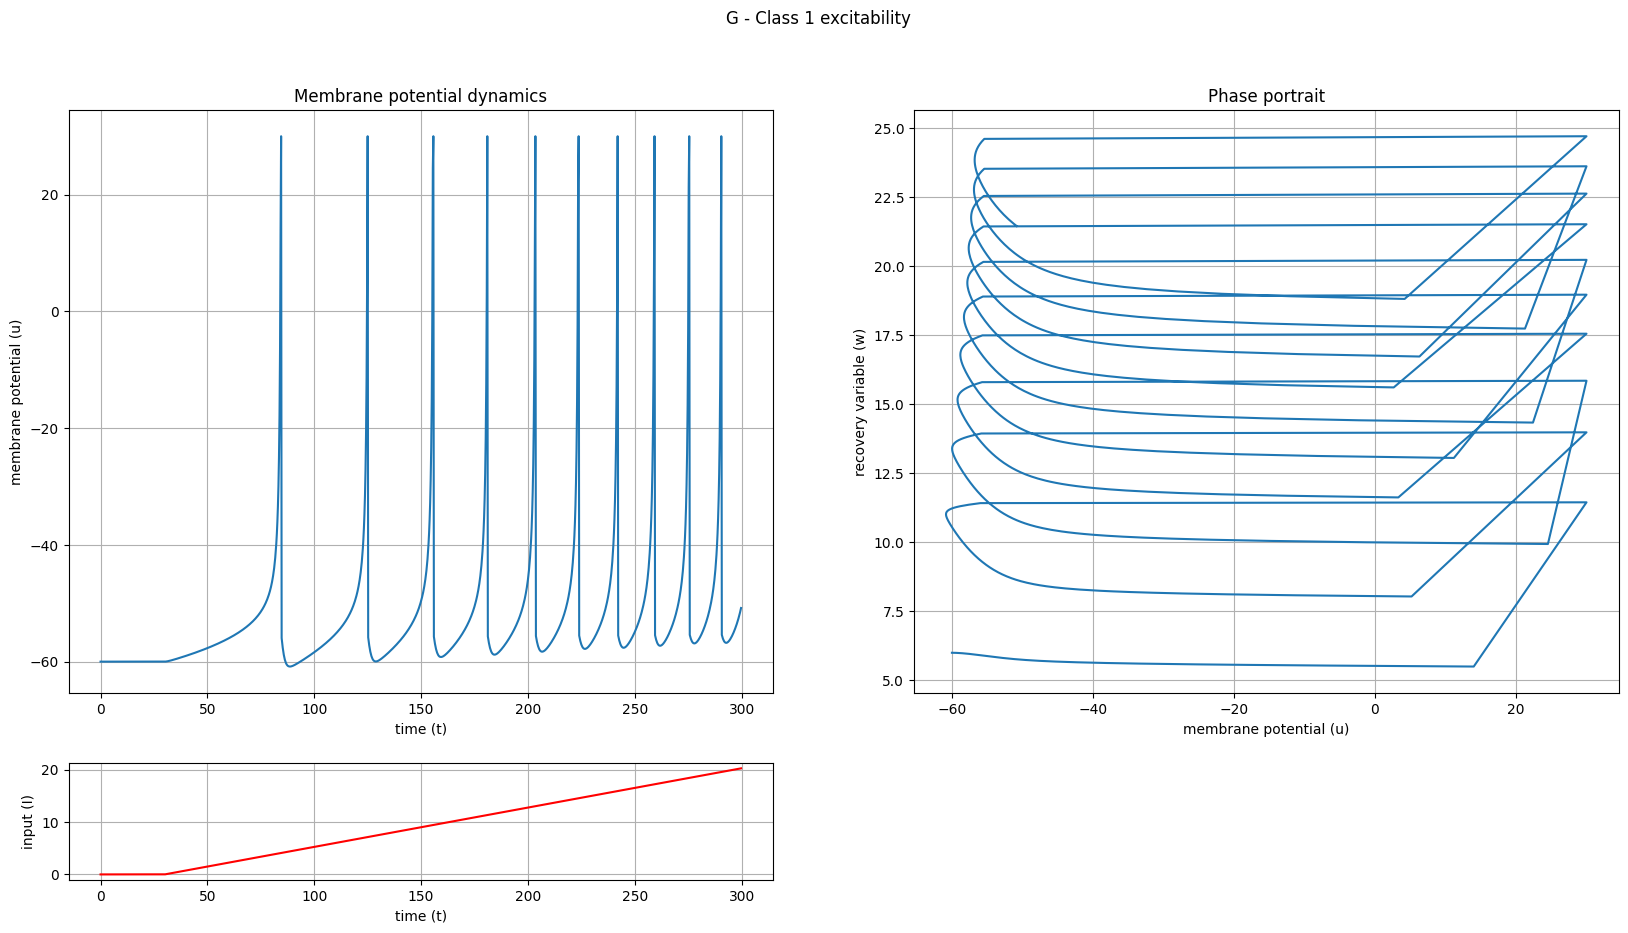

In [11]:
class C1EIzhikevichModel(IzhikevichModel):

    def _compute_u_incrementation(self, I: float, u: float, w: float) -> float:
        return 0.04 * u ** 2 + 4.1 * u + 108 - w + I


def current_generator(t: float) -> float:
    if t > 30:
        return 0.075 * (t - 30)
    else:
        return 0


class_1_excitability = C1EIzhikevichModel(a=0.02, b=-0.1, c=-55, d=6)

result = simulate_neuron(
    model=class_1_excitability,
    current_generator=current_generator,
    tau=0.25,
    t_max=300,
    u_init=-60,
)
plot_simulation('G - Class 1 excitability', result)

## H - Class 2 excitability

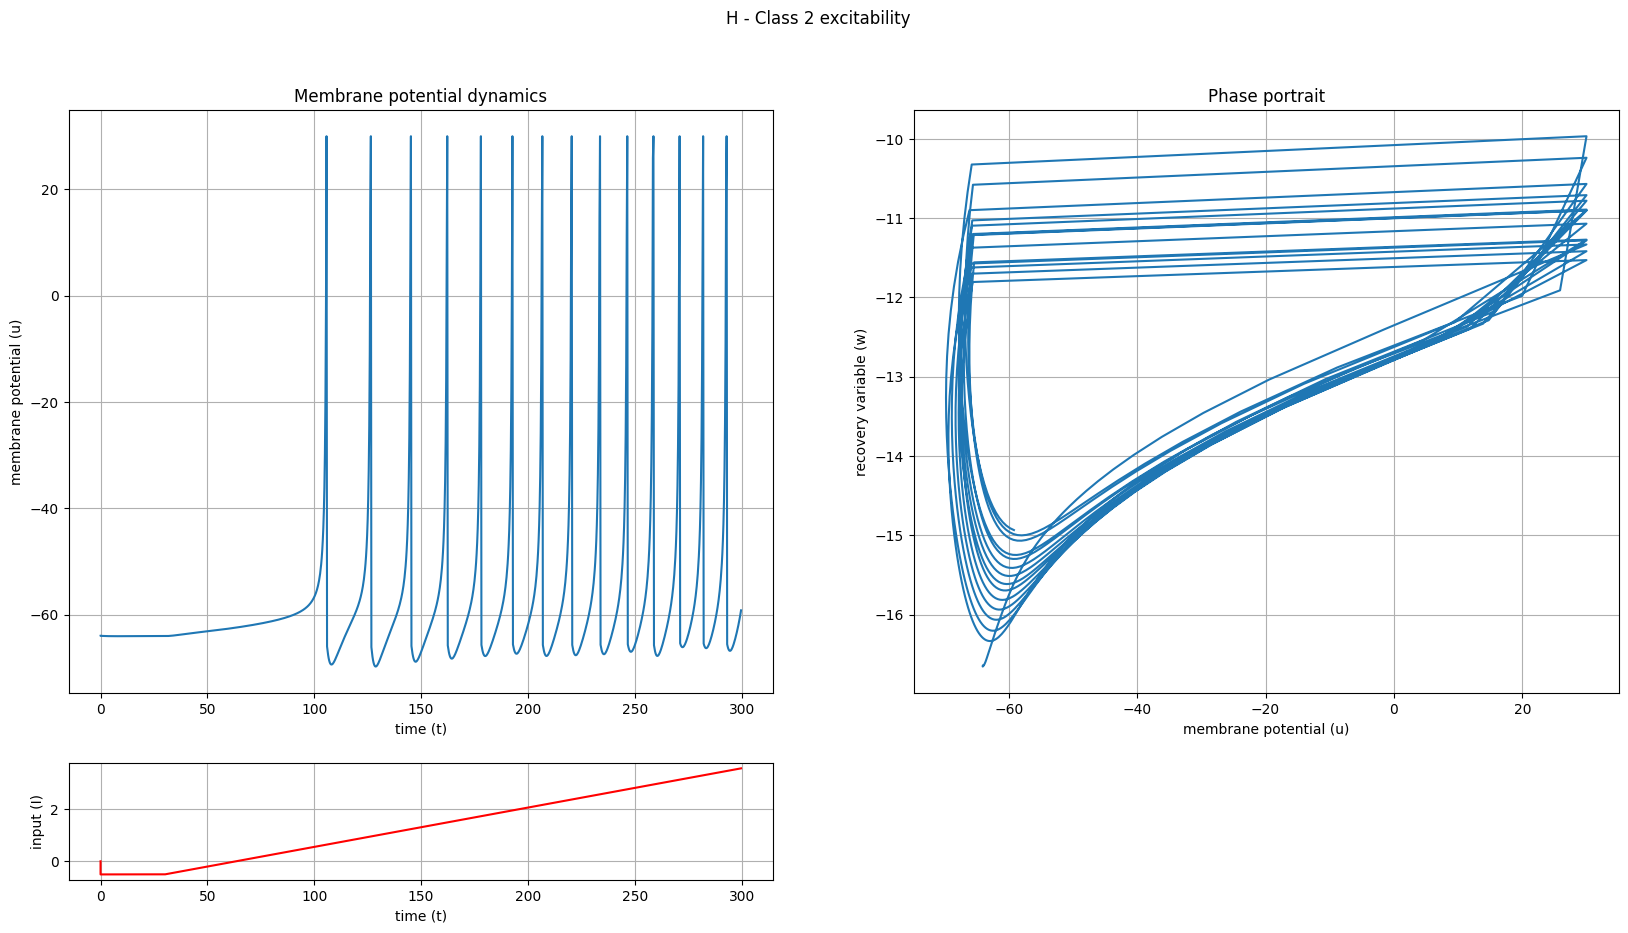

In [12]:
T1 = 30


def current_generator(t: float) -> float:
    if t > T1:
        return -0.5 + (0.015 * (t - T1))
    else:
        return -0.5


class_2_excitability = IzhikevichModel(a=0.2, b=0.26, c=-65, d=0)

result = simulate_neuron(
    model=class_2_excitability,
    current_generator=current_generator,
    tau=0.25,
    t_max=300,
    u_init=-64,
)
plot_simulation('H - Class 2 excitability', result)

## I - spike latency

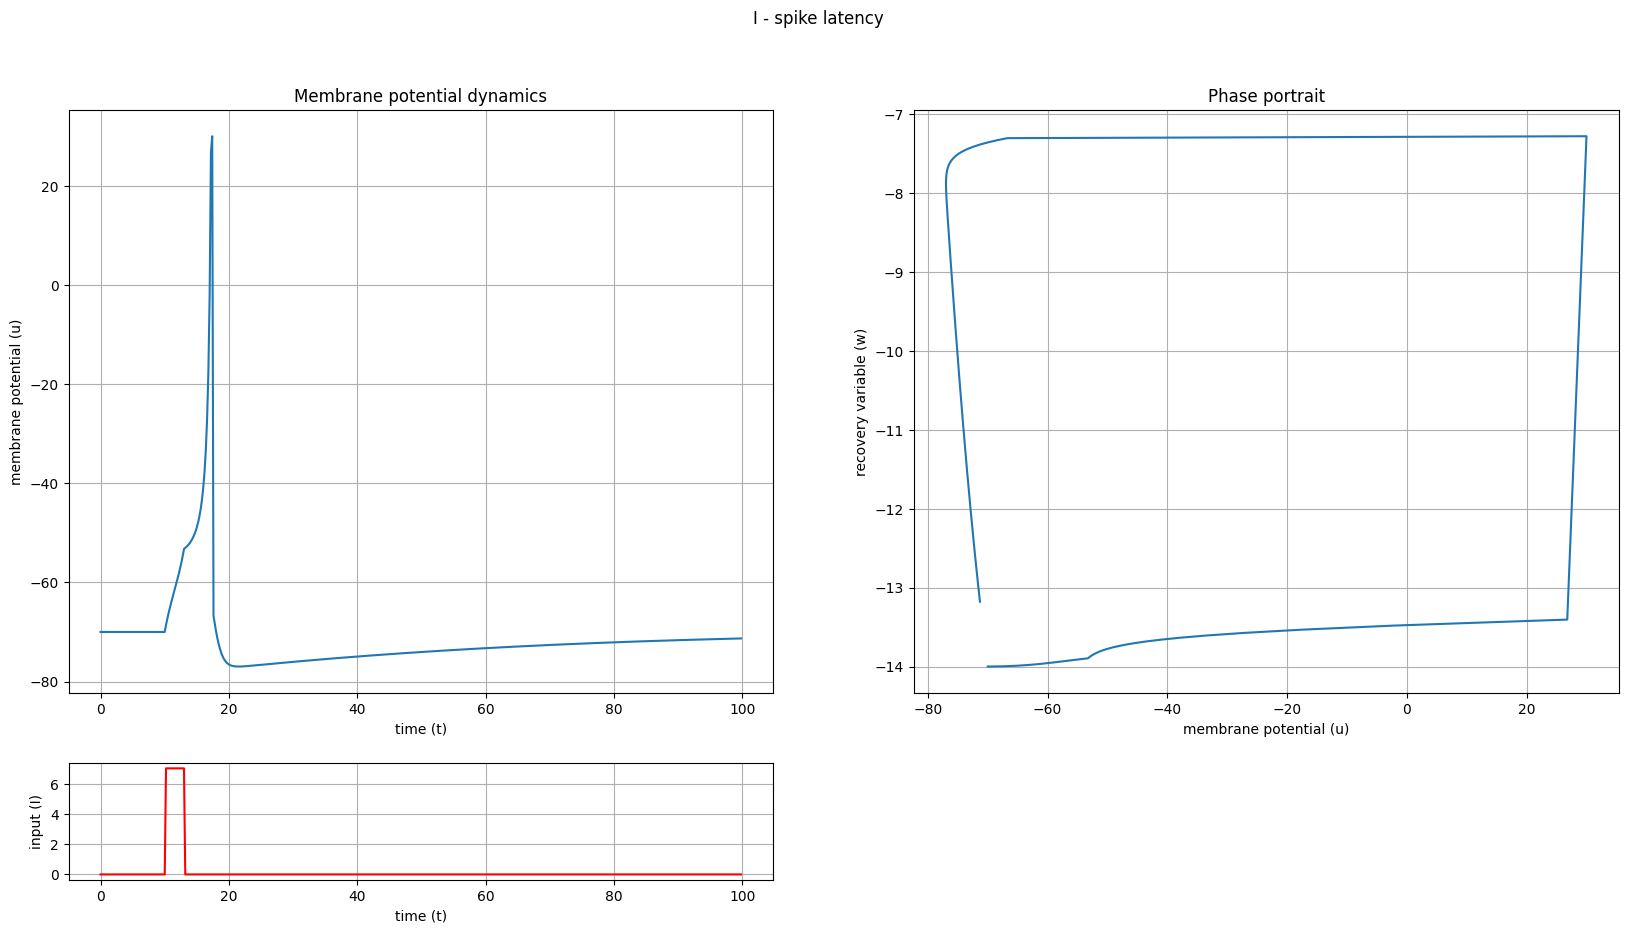

In [13]:
t_max = 100
T1 = t_max / 10


def current_generator(t: float) -> float:
    if T1 < t < T1 + 3:
        return 7.04
    else:
        return 0


spike_latency = IzhikevichModel(a=0.02, b=0.2, c=-65, d=6)

result = simulate_neuron(
    model=spike_latency,
    current_generator=current_generator,
    tau=0.2,
    t_max=t_max,
    u_init=-70,
)
plot_simulation('I - spike latency', result)

## J - subthreshold oscillations

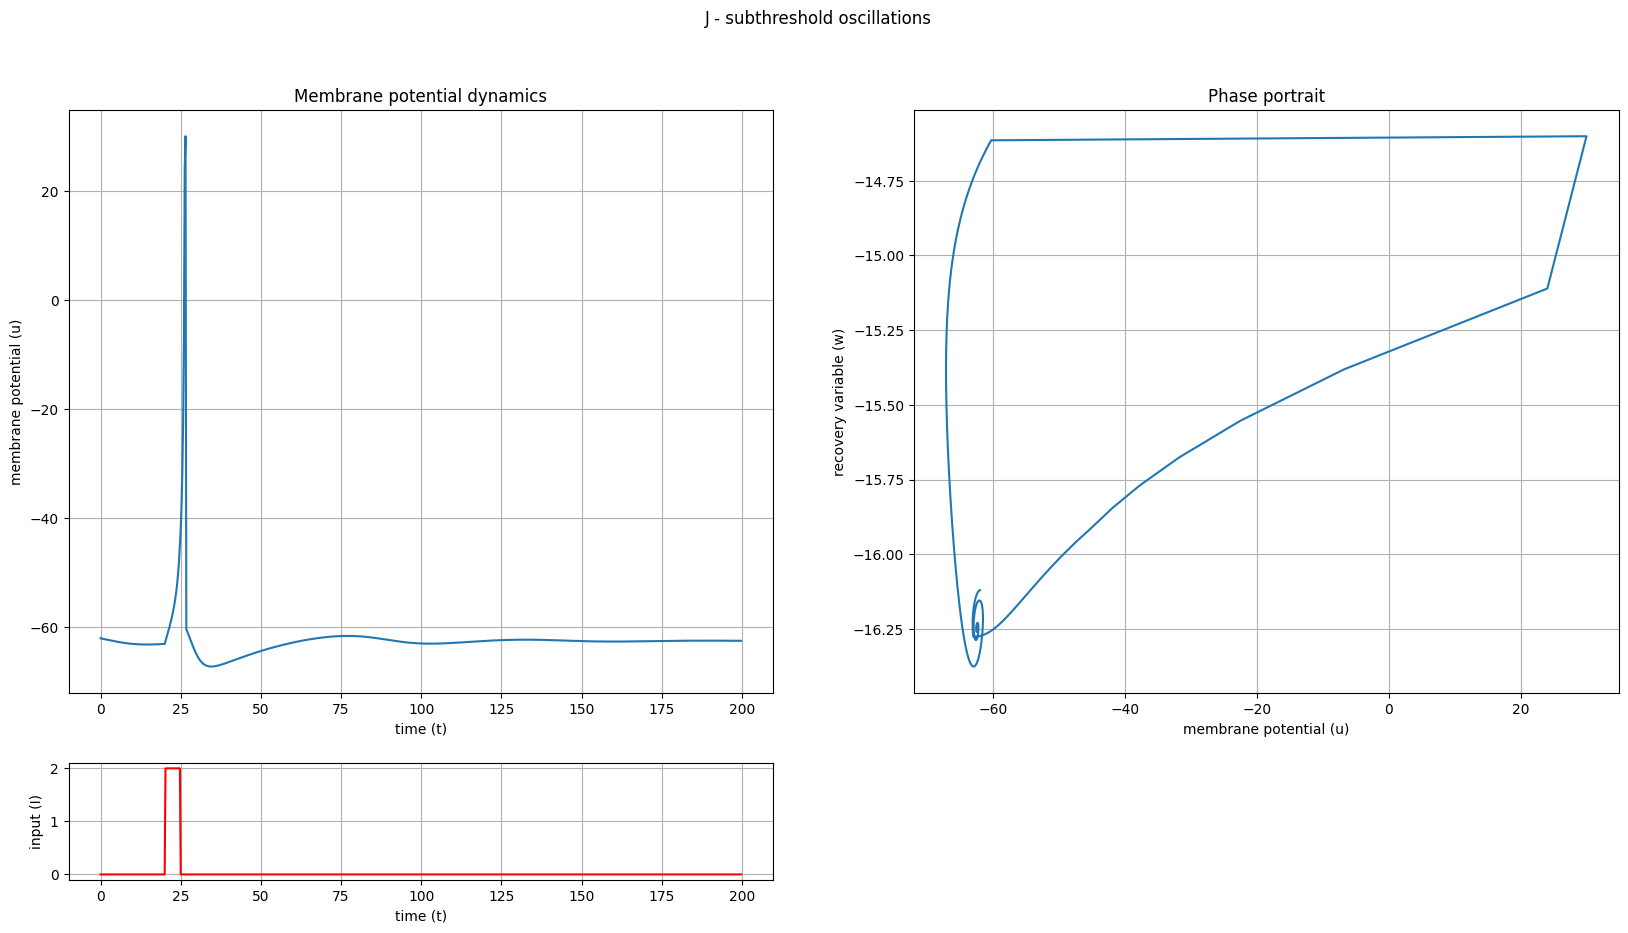

In [14]:
t_max = 200
T1 = t_max / 10


def current_generator(t: float) -> float:
    if T1 < t < T1 + 5:
        return 2
    else:
        return 0


subthreshold_oscillations = IzhikevichModel(a=0.05, b=0.26, c=-60, d=0)

result = simulate_neuron(
    model=subthreshold_oscillations,
    current_generator=current_generator,
    tau=0.25,
    t_max=t_max,
    u_init=-62,
)
plot_simulation('J - subthreshold oscillations', result)

## K - resonator

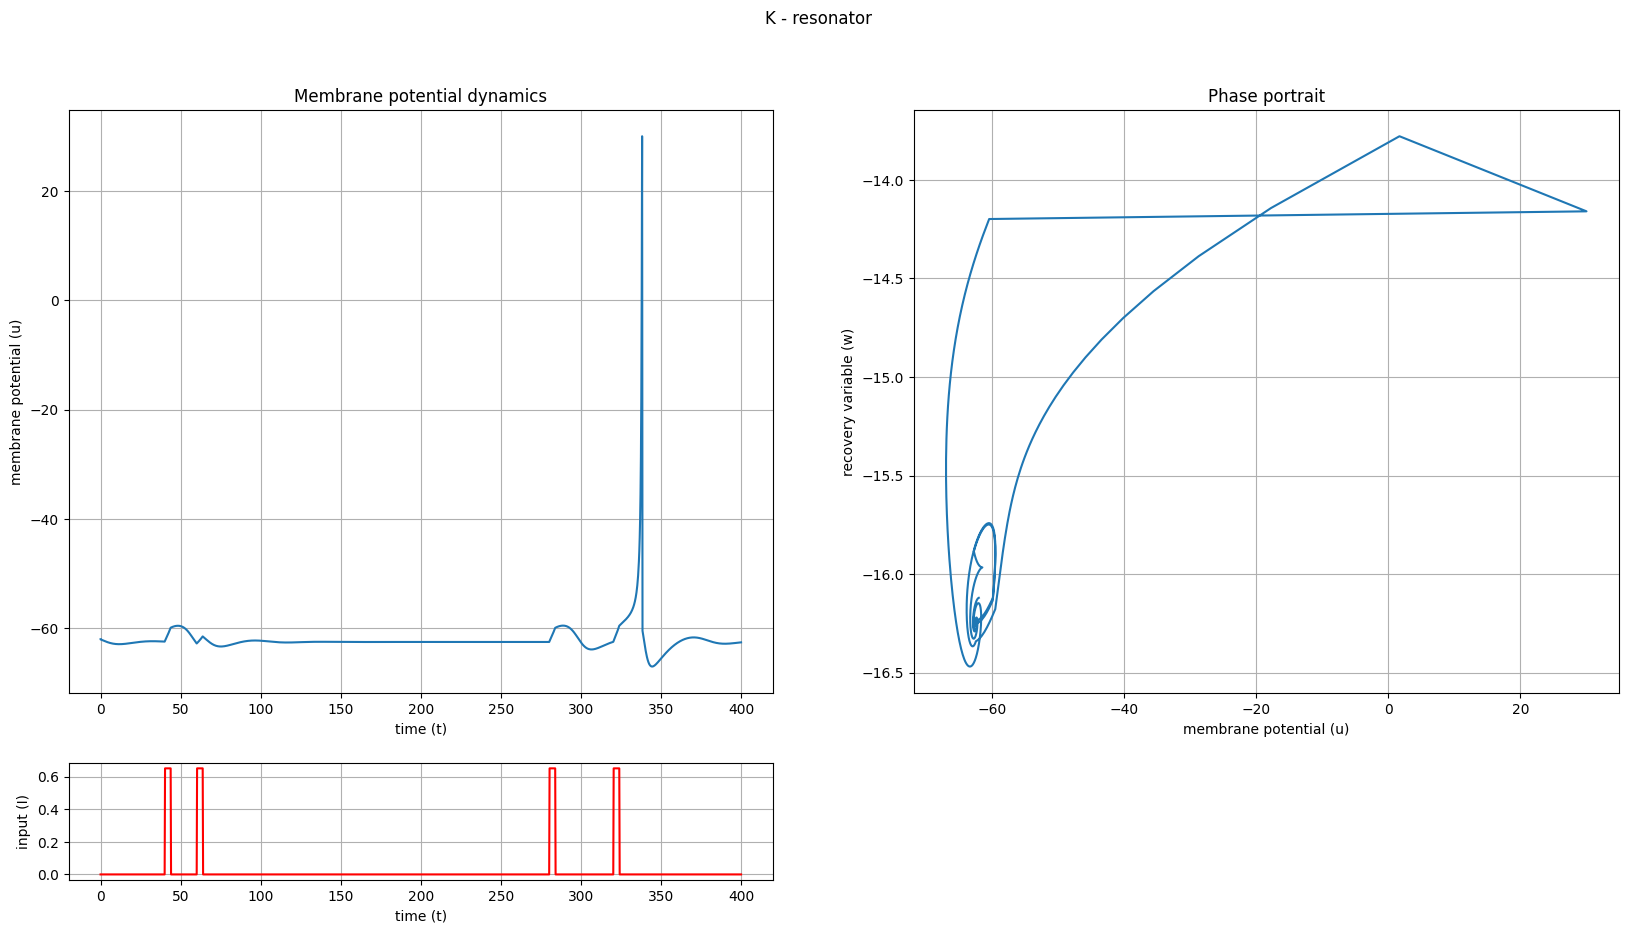

In [15]:
t_max = 400
T1 = t_max / 10
T2 = T1 + 20
T3 = 0.7 * t_max
T4 = T3 + 40


def current_generator(t: float) -> float:
    if T1 < t < T1 + 4 or T2 < t < T2 + 4 or T3 < t < T3 + 4 or T4 < t < T4 + 4:
        return 0.65
    else:
        return 0


resonator = IzhikevichModel(a=0.1, b=0.26, c=-60, d=-1)

result = simulate_neuron(
    model=resonator,
    current_generator=current_generator,
    tau=0.25,
    t_max=t_max,
    u_init=-62,
)
plot_simulation('K - resonator', result)

## L - integrator

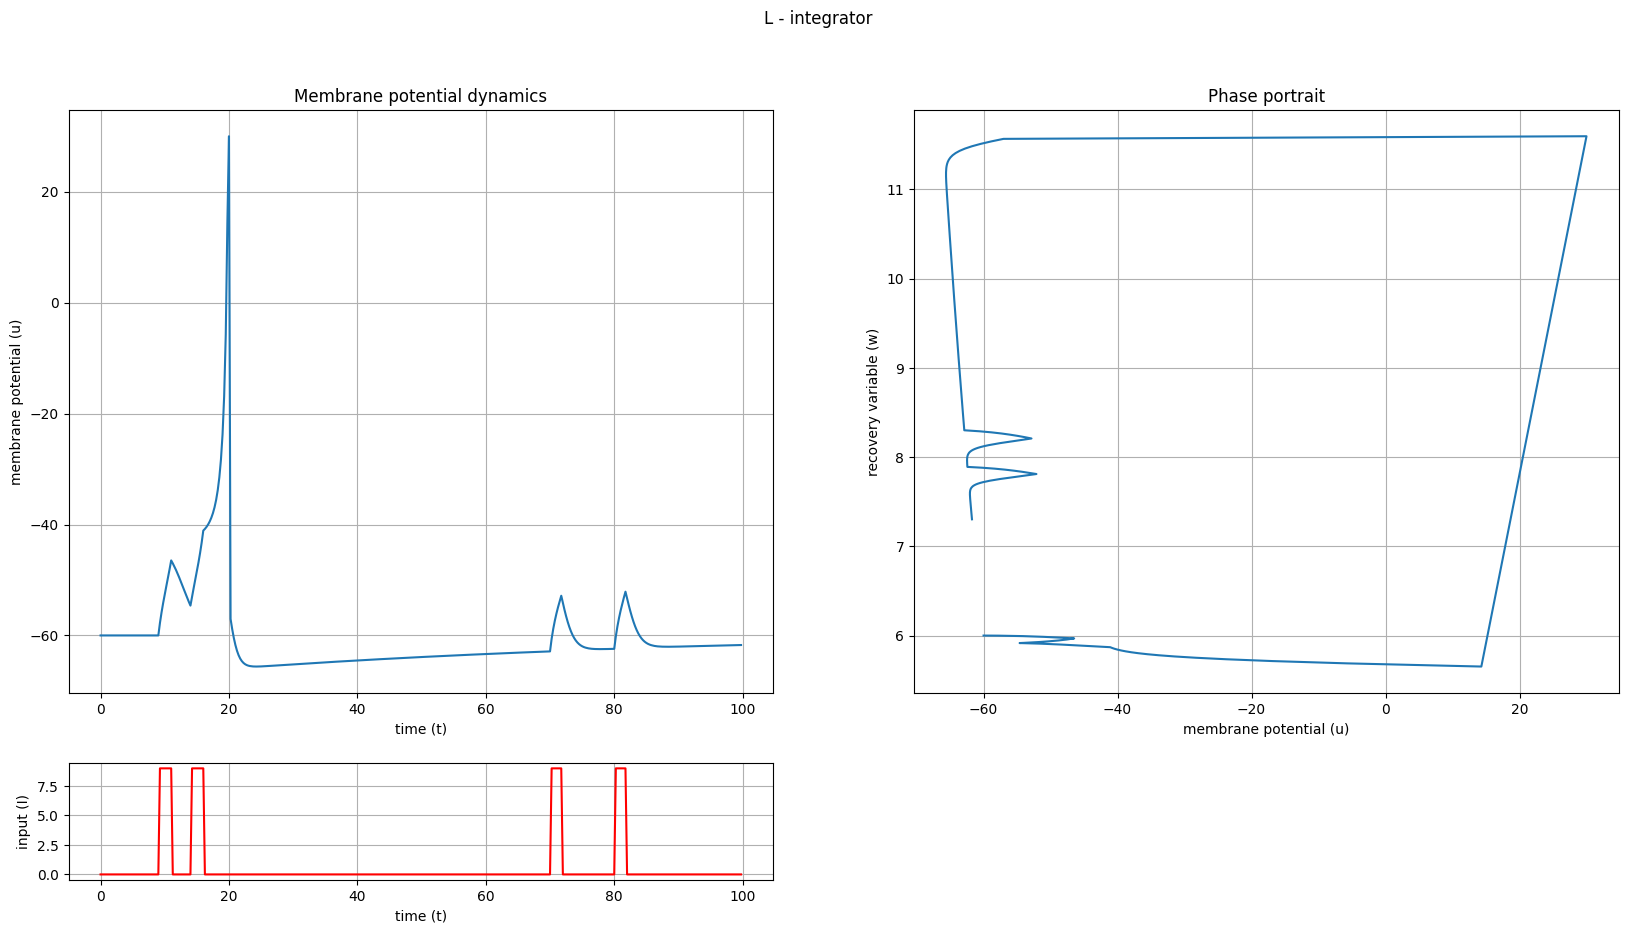

In [16]:
# L - integrator
t_max = 100
T1 = t_max / 11
T2 = T1 + 5
T3 = 0.7 * t_max
T4 = T3 + 10


class IntegratorIzhikevichModel(IzhikevichModel):

    def _compute_u_incrementation(self, I: float, u: float, w: float) -> float:
        return 0.04 * u ** 2 + 4.1 * u + 108 - w + I


def current_generator(t: float) -> float:
    if T1 < t < T1 + 2 or T2 < t < T2 + 2 or T3 < t < T3 + 2 or T4 < t < T4 + 2:
        return 9
    else:
        return 0


integrator = IntegratorIzhikevichModel(a=0.02, b=-0.1, c=-55, d=6)

result = simulate_neuron(
    model=integrator,
    current_generator=current_generator,
    tau=0.25,
    t_max=t_max,
    u_init=-60,
)
plot_simulation('L - integrator', result)

## M - rebound spike

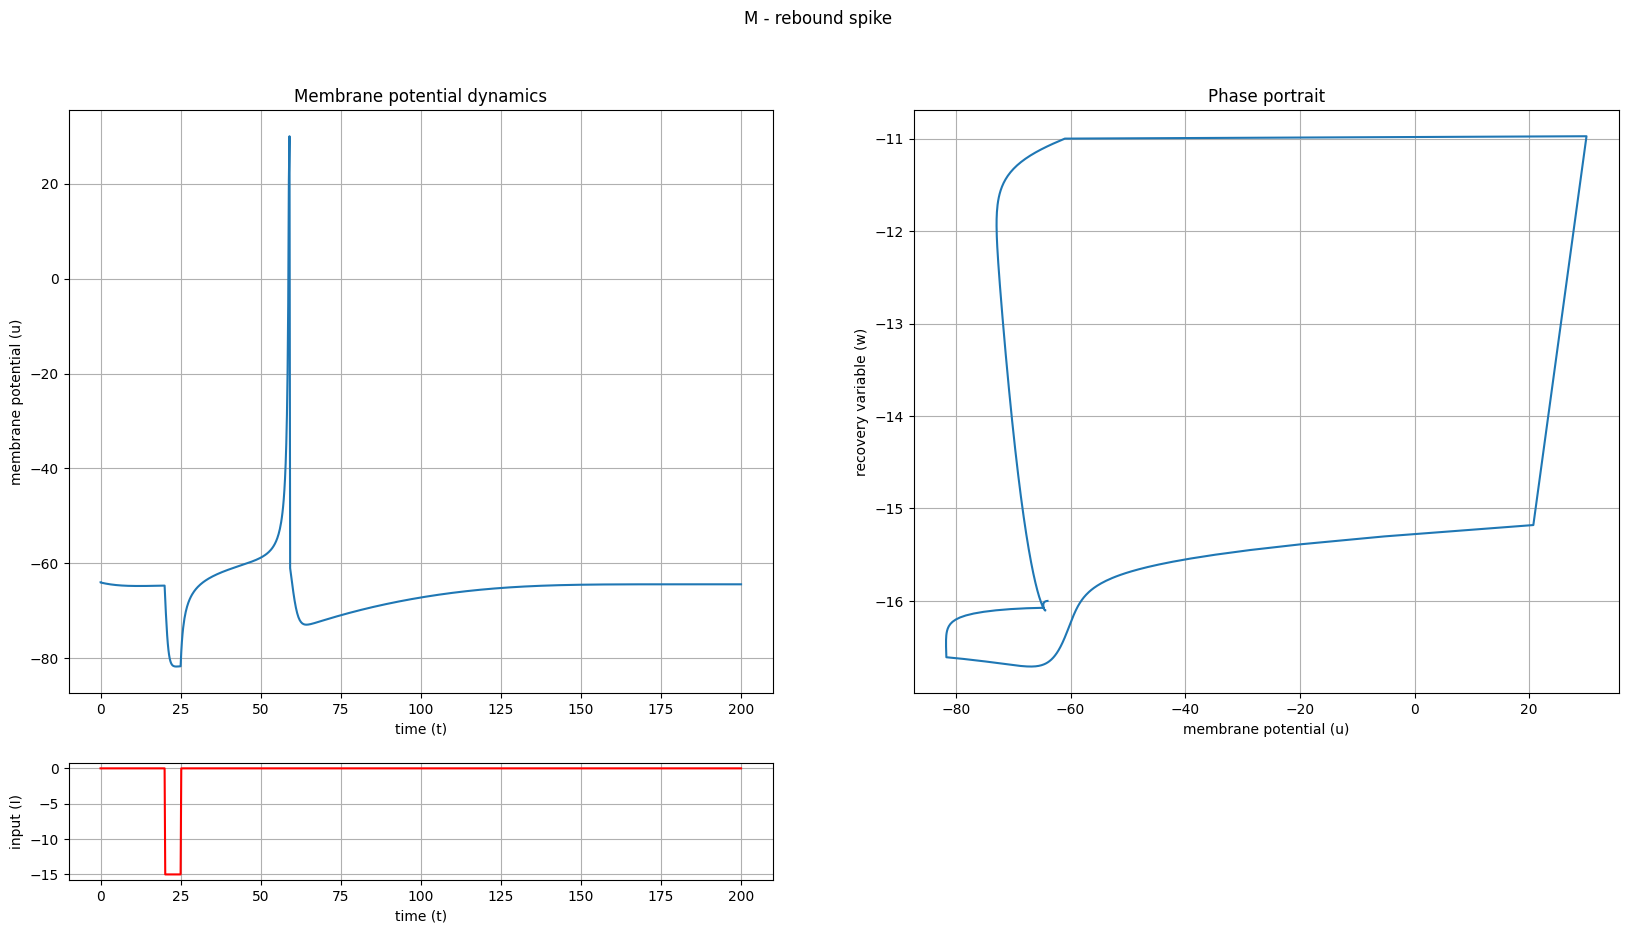

In [17]:
T1 = 20


def current_generator(t: float) -> float:
    if T1 < t < T1 + 5:
        return -15
    else:
        return 0


rebound_spike = IzhikevichModel(a=0.03, b=0.25, c=-60, d=4)

result = simulate_neuron(
    model=rebound_spike,
    current_generator=current_generator,
    tau=0.2,
    t_max=200,
    u_init=-64,
)
plot_simulation('M - rebound spike', result)

## N - rebound burst

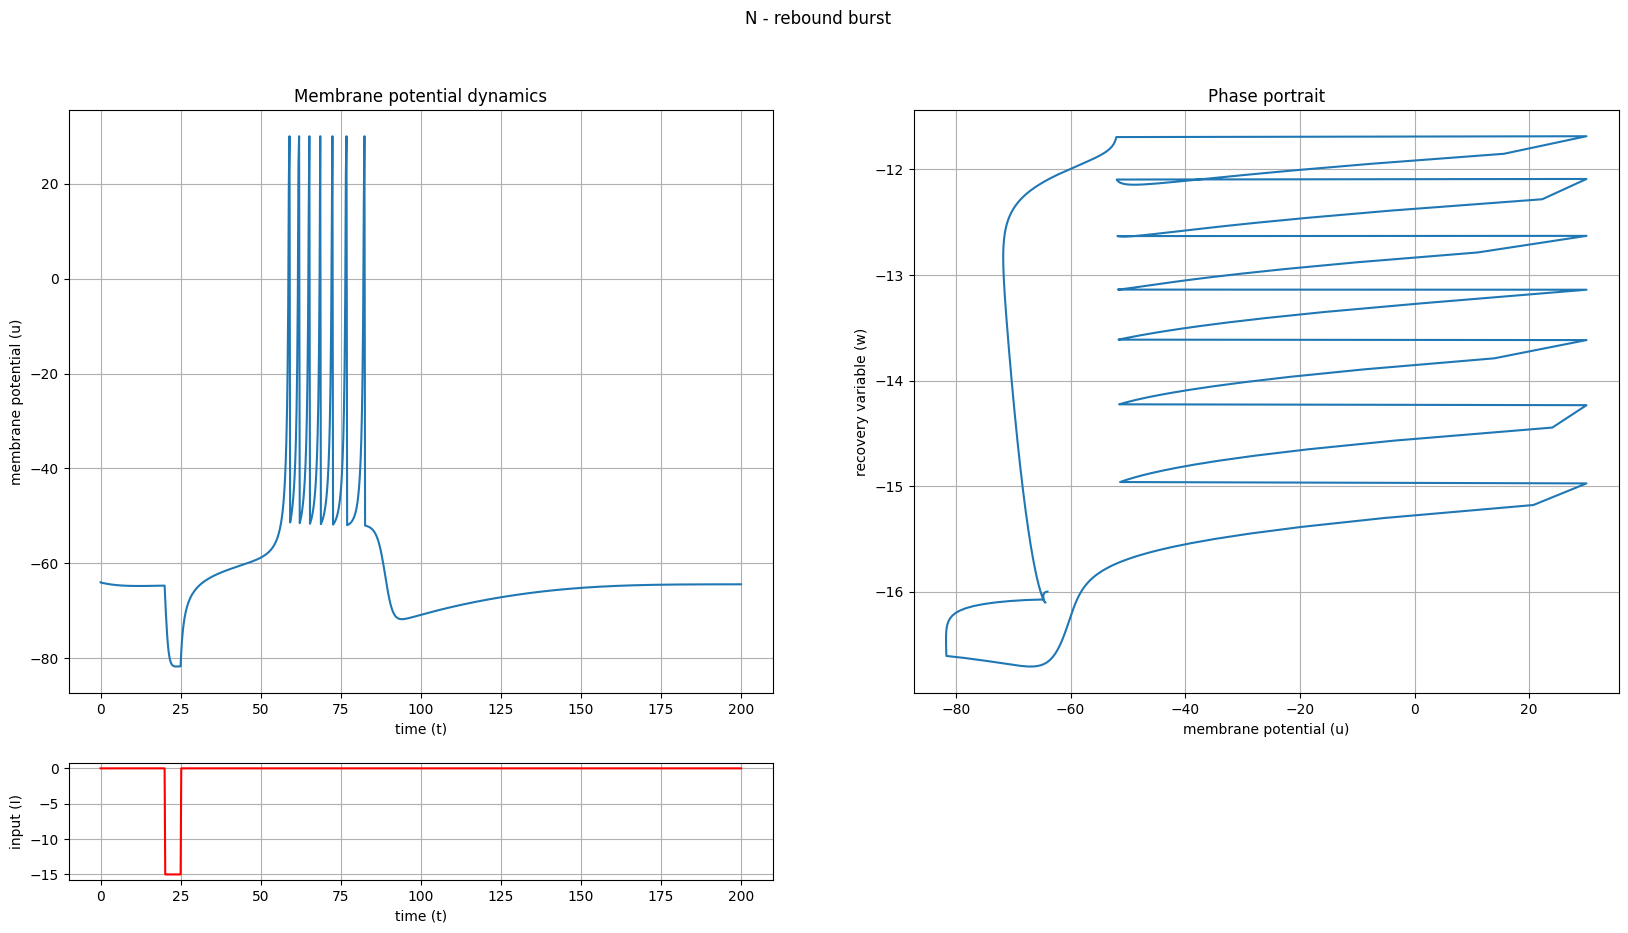

In [18]:
T1 = 20


def current_generator(t: float) -> float:
    if T1 < t < T1 + 5:
        return -15
    else:
        return 0


rebound_burst = IzhikevichModel(a=0.03, b=0.25, c=-52, d=0)

result = simulate_neuron(
    model=rebound_burst,
    current_generator=current_generator,
    tau=0.2,
    t_max=200,
    u_init=-64,
)
plot_simulation('N - rebound burst', result)

## O - threshold variability

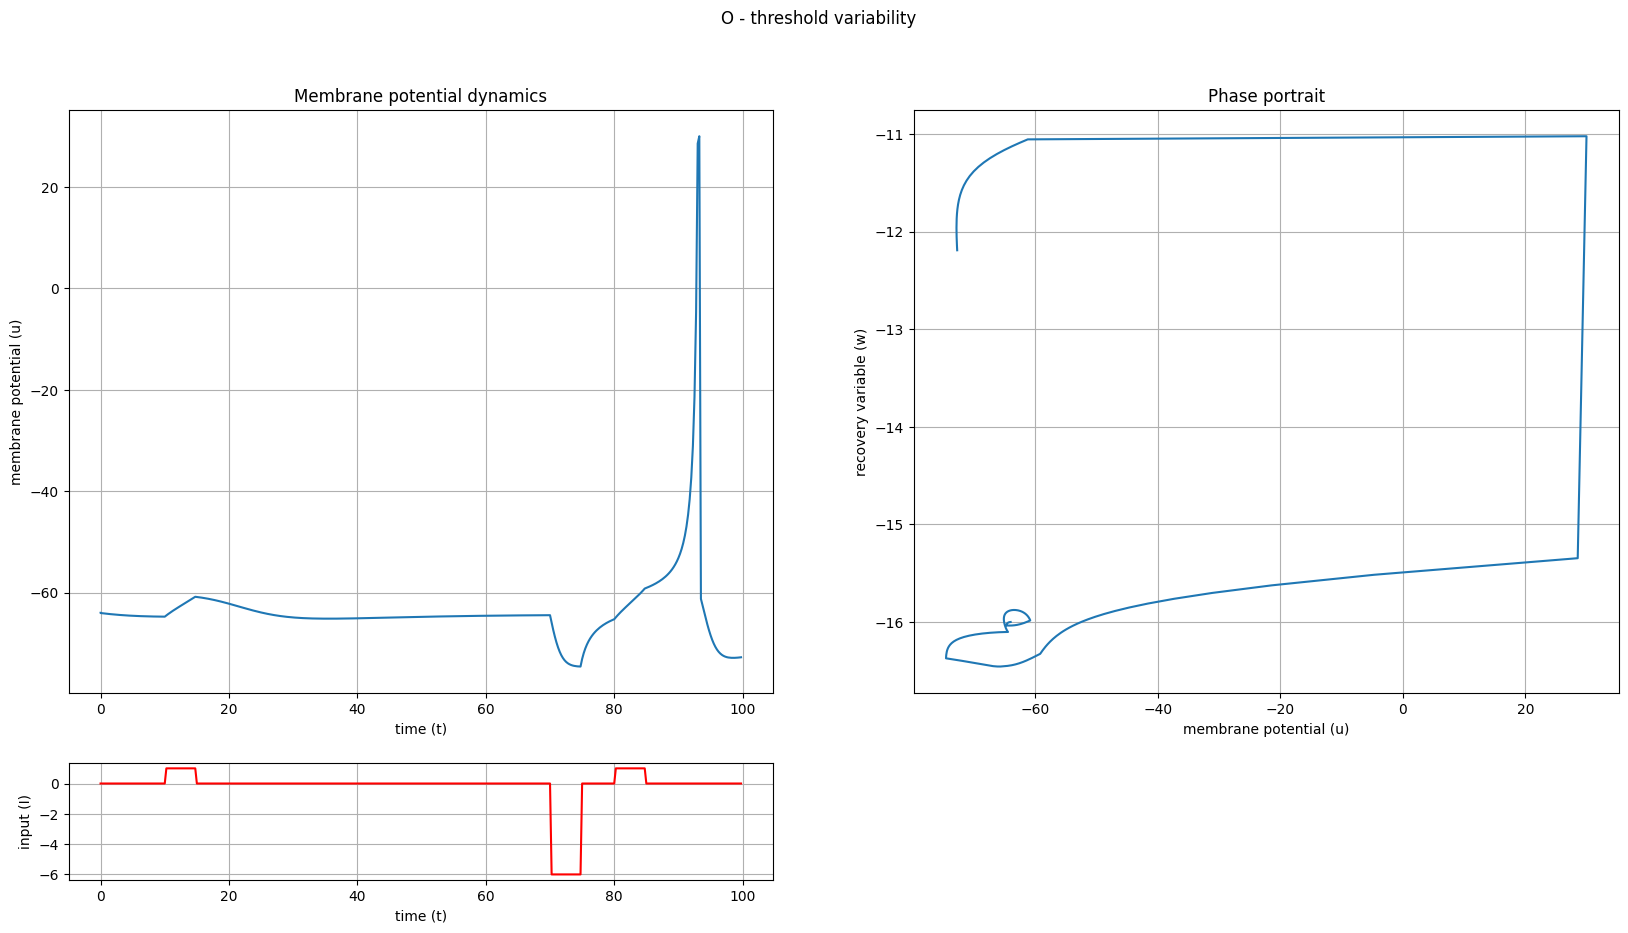

In [19]:
def current_generator(t: float) -> float:
    if 10 < t < 15 or 80 < t < 85:
        return 1
    elif 70 < t < 75:
        return -6
    else:
        return 0


threshold_variability = IzhikevichModel(a=0.03, b=0.25, c=-60, d=4)

result = simulate_neuron(
    model=threshold_variability,
    current_generator=current_generator,
    tau=0.25,
    t_max=100,
    u_init=-64,
)
plot_simulation('O - threshold variability', result)

## P - bistability

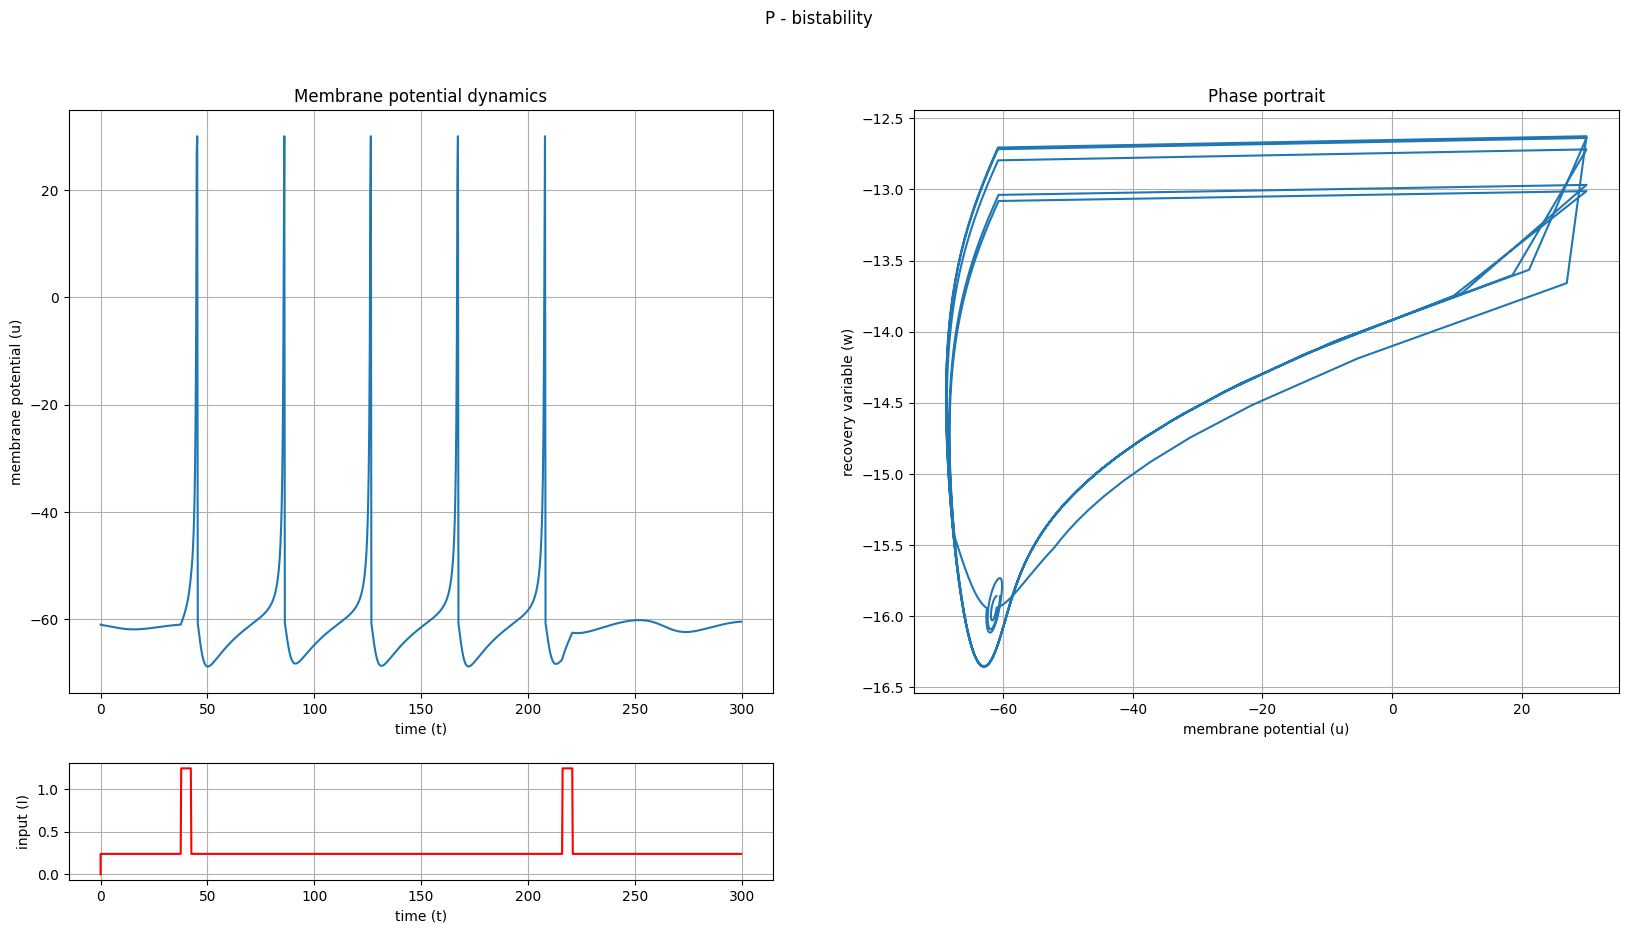

In [20]:
t_max = 300
T1 = t_max / 8
T2 = 216


def current_generator(t: float) -> float:
    if T1 < t < T1 + 5 or T2 < t < T2 + 5:
        return 1.24
    else:
        return 0.24


bistability = IzhikevichModel(a=0.1, b=0.26, c=-60, d=0)

result = simulate_neuron(
    model=bistability,
    current_generator=current_generator,
    tau=0.25,
    t_max=t_max,
    u_init=-61,
)
plot_simulation('P - bistability', result)

## Q - DAP (depolarizing after potential)

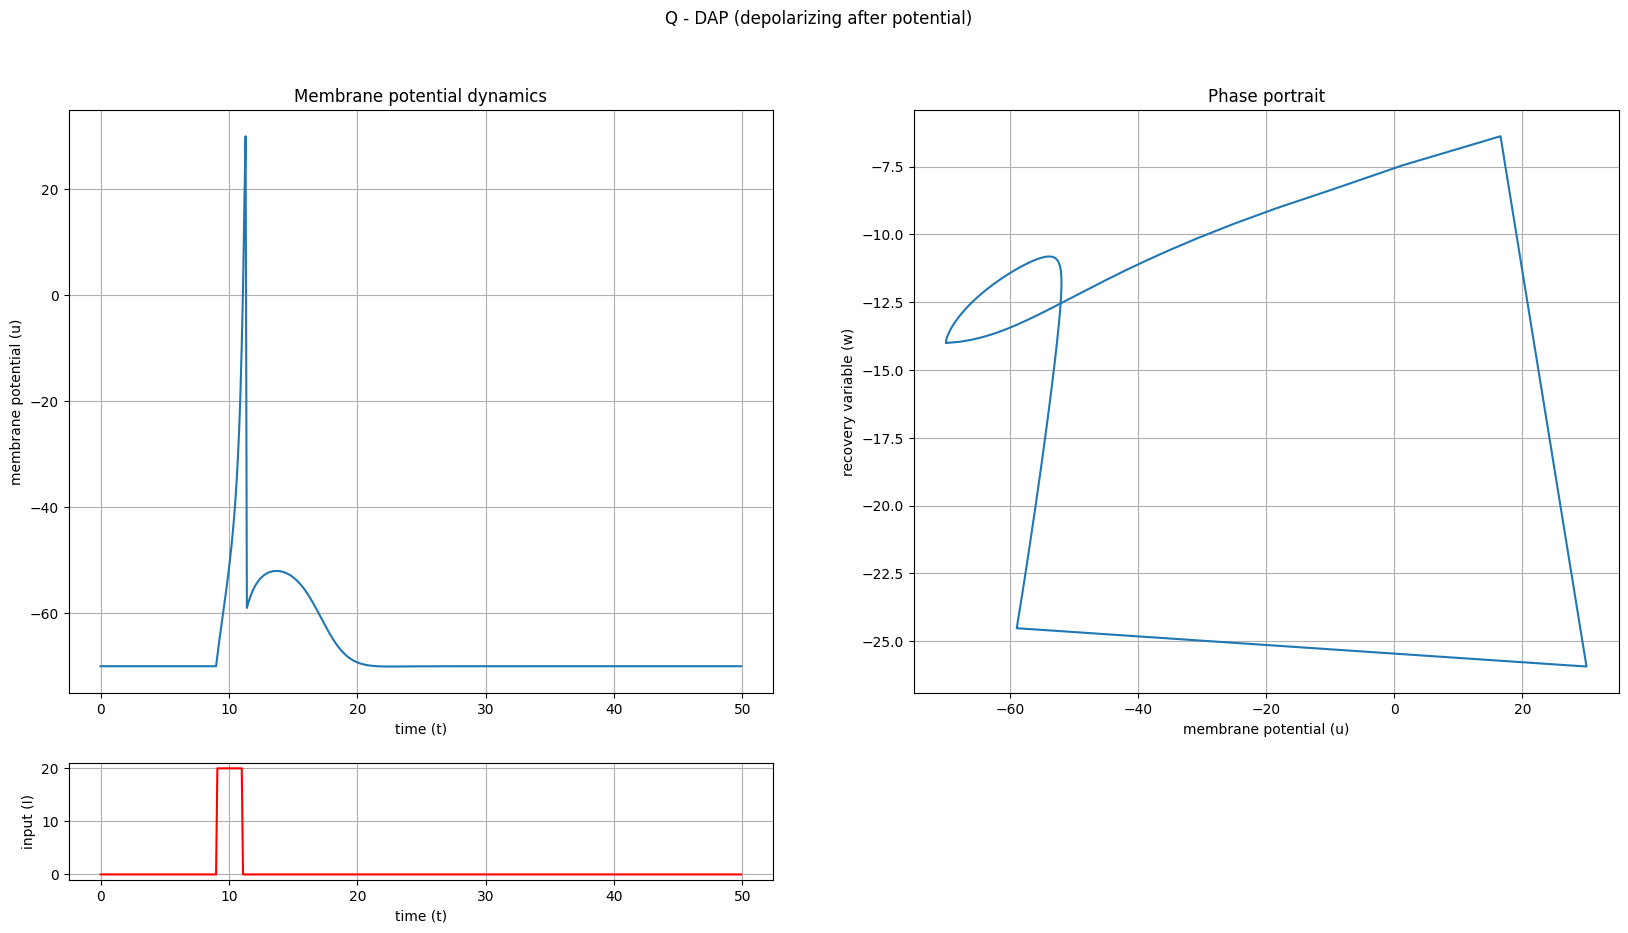

In [21]:
T1 = 10


def current_generator(t: float) -> float:
    if abs(t - T1) < 1:
        return 20
    else:
        return 0


dap = IzhikevichModel(a=1, b=0.2, c=-60, d=-21)

result = simulate_neuron(
    model=dap,
    current_generator=current_generator,
    tau=0.1,
    t_max=50,
    u_init=-70,
)
plot_simulation('Q - DAP (depolarizing after potential)', result)

## R - accomodation

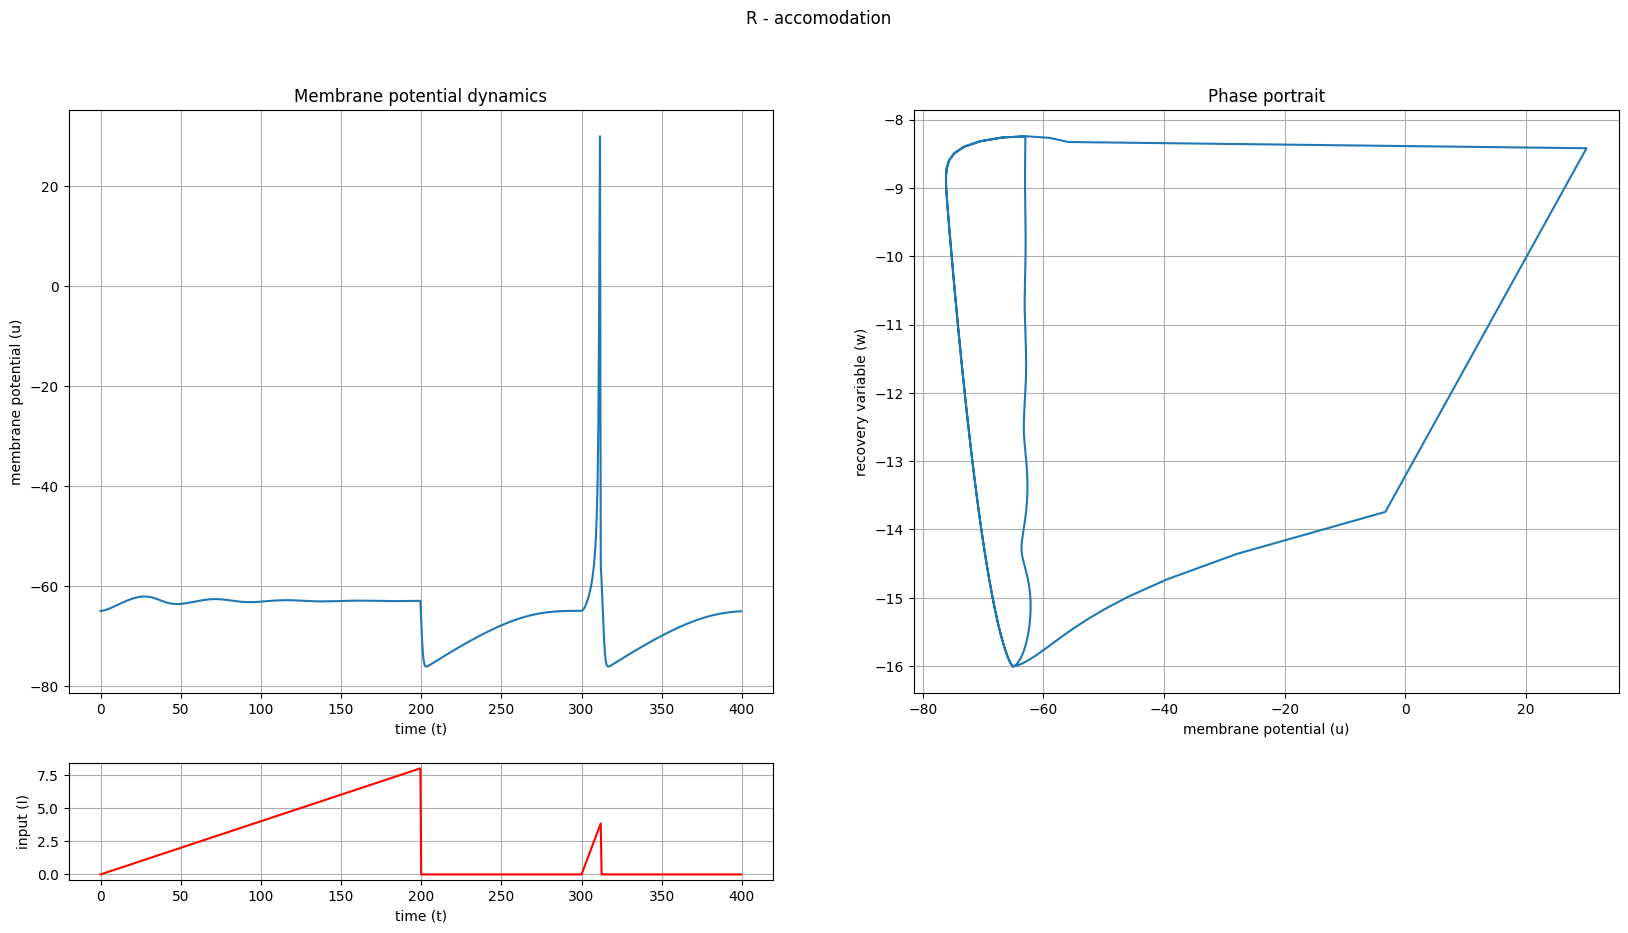

In [22]:
class AccomodationIzhikevichModel(IzhikevichModel):

    def _compute_w_incrementation(self, u: float, w: float) -> float:
        return self.a * self.b * (u + 65)


def current_generator(t: float) -> float:
    if t < 200:
        return t / 25
    elif t < 300:
        return 0
    elif t < 312.5:
        return (t - 300) / 12.5 * 4
    else:
        return 0


accomodation = AccomodationIzhikevichModel(a=0.02, b=1, c=-55, d=4)

result = simulate_neuron(
    model=accomodation,
    current_generator=current_generator,
    tau=0.5,
    t_max=400,
    u_init=-65,
    w_init=-16,
)
plot_simulation('R - accomodation', result)

## S - inhibition induced spiking

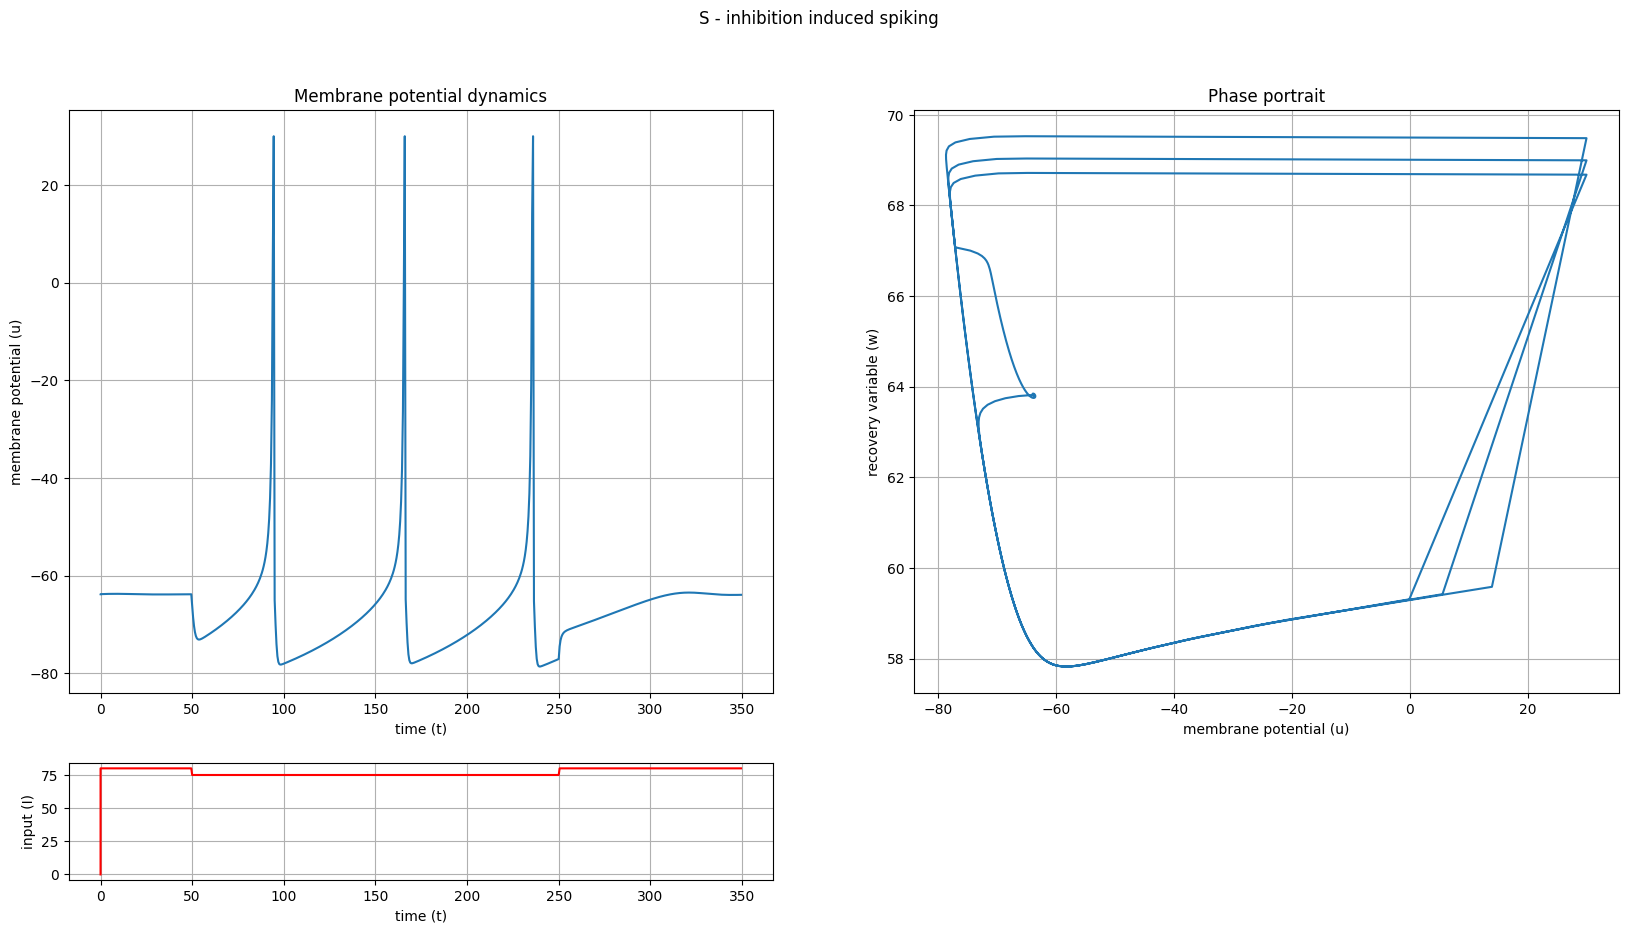

In [23]:
def current_generator(t: float) -> float:
    if t < 50 or 250 < t:
        return 80
    else:
        return 75


inhibition_induced_spiking = IzhikevichModel(a=-0.02, b=-1, c=-60, d=8)

result = simulate_neuron(
    model=inhibition_induced_spiking,
    current_generator=current_generator,
    tau=0.5,
    t_max=350,
    u_init=-63.8,
)
plot_simulation('S - inhibition induced spiking', result)

## T - inhibition induced bursting

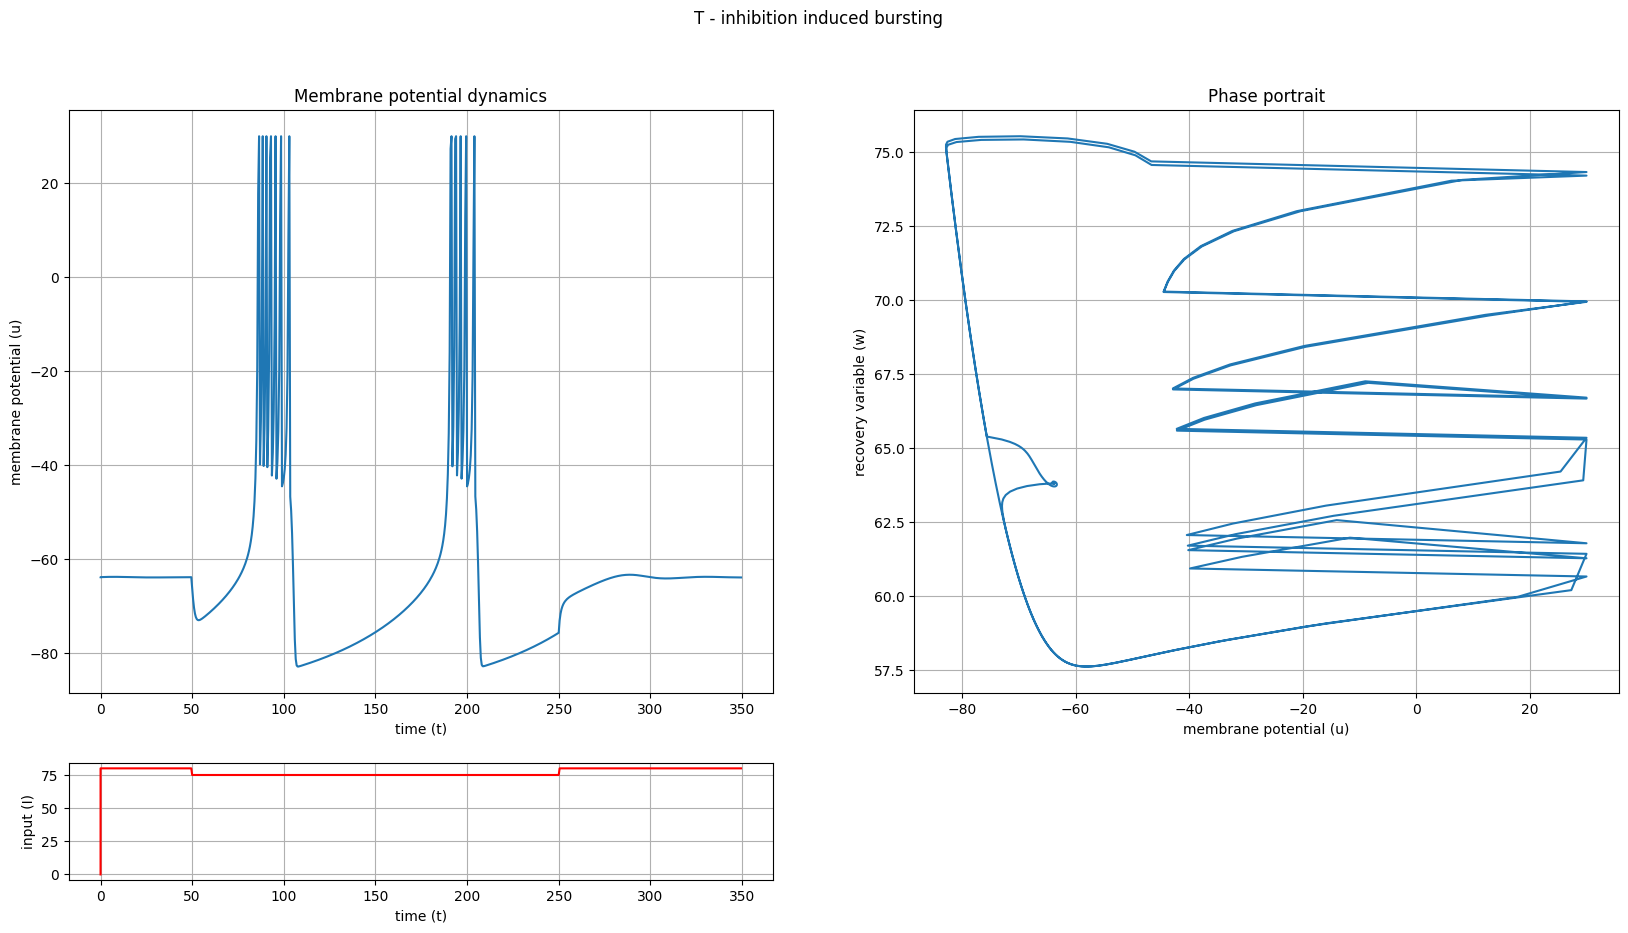

In [24]:
def current_generator(t: float) -> float:
    if t < 50 or 250 < t:
        return 80
    else:
        return 75


inhibition_induced_bursting = IzhikevichModel(a=-0.026, b=-1, c=-45, d=-2)

result = simulate_neuron(
    model=inhibition_induced_bursting,
    current_generator=current_generator,
    tau=0.5,
    t_max=350,
    u_init=-63.8,
)
plot_simulation('T - inhibition induced bursting', result)